## Import

In [2]:
import pandas as pd
import json
import os
import pandas as pd
import pyarrow.parquet as pq

#### Graph

#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
#from geopy.geocoders import Nominatim
import seaborn as sns
#import squarify
import matplotlib.patches as mpatches
from pywaffle import Waffle
import plotly.graph_objects as go

import statsmodels.api as sm

## Conversion csv to parquet

afin de manier des fichiers + légers et opti , conversion en format parquet

### Tout le dossier

'''



# Spécifiez le chemin absolu vers le répertoire du script
script_directory = r"C:\Users\SKONIECZNY\Desktop\Cars_Analysis\occasions_cars\le_parking\script"

# Construisez le chemin absolu du dossier "data" en fonction du dossier "script"
data_directory = os.path.join(script_directory, '..', 'data')

# Parcourez les fichiers dans le dossier "data"
for filename in os.listdir(data_directory):
    # Vérifiez si le fichier a l'extension .csv
    if filename.endswith(".csv"):
        # Construisez le chemin absolu du fichier CSV
        csv_file_path = os.path.join(data_directory, filename)

        # Construisez le chemin absolu du fichier Parquet en remplaçant l'extension
        parquet_file_path = os.path.join(data_directory, os.path.splitext(filename)[0] + '.parquet')

        # Vérifiez si le fichier Parquet existe déjà, dans ce cas, ne rien faire
        if os.path.exists(parquet_file_path):
            print(f"Le fichier {filename} a déjà été converti en {os.path.basename(parquet_file_path)}")
            continue

        try:
            # Chargez le fichier CSV en utilisant Pandas avec gestion d'erreur pour les lignes problématiques
            df = pd.read_csv(csv_file_path, error_bad_lines=False, encoding='utf-8')
        except pd.errors.ParserError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")
            continue
        except UnicodeDecodeError as e:
            print(f"Erreur de décodage lors de la lecture du fichier {filename}: {e}")
            continue

        # Écrivez le DataFrame dans un fichier Parquet
        df.to_parquet(parquet_file_path)

        print(f"Le fichier {filename} a été converti en {os.path.basename(parquet_file_path)}")
'''

## Création dun csv réunissant tout les autres Csv ( merged)

In [3]:


# Spécifiez le chemin absolu vers le répertoire du script
script_directory = r"D:\Cars_Analysis\occasions_cars\le_parking\script"

# Construisez le chemin absolu du dossier "data" en fonction du dossier "script"
data_directory = os.path.join(script_directory, '..', 'data')

# Initialisez une liste pour stocker les DataFrames de chaque fichier CSV
dfs = []
# Chemin absolu du fichier .parquet
parquet_file_path = r"D:\Cars_Analysis\occasions_cars\le_parking\data\leparking.parquet"

# Charger le fichier .parquet en utilisant pyarrow
parquet_table = pq.read_table(parquet_file_path)

# Convertir la table parquet en DataFrame pandas
parquet_df = parquet_table.to_pandas()

# Ajouter le DataFrame du fichier .parquet à la liste
dfs.append(parquet_df)

# Parcourez les fichiers dans le dossier "data"
for filename in os.listdir(data_directory):
    # Vérifiez si le fichier a l'extension .csv
    if filename.endswith(".csv"):
        # Construisez le chemin absolu du fichier CSV
        csv_file_path = os.path.join(data_directory, filename)

        try:
            # Chargez le fichier CSV en utilisant Pandas avec gestion d'erreur pour les lignes problématiques
            df = pd.read_csv(csv_file_path, encoding='utf-8')

            # Ajoutez le DataFrame à la liste
            dfs.append(df)

        except pd.errors.ParserError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")
        except UnicodeDecodeError as e:
            print(f"Erreur de décodage lors de la lecture du fichier {filename}: {e}")

# Fusionnez tous les DataFrames de la liste en un seul DataFrame
df = pd.concat(dfs, ignore_index=True)

# Affichez les premières lignes du DataFrame fusionné
print(df.head())

# Vous pouvez également écrire le DataFrame fusionné dans un fichier CSV si nécessaire
df.to_csv(os.path.join(data_directory, 'merged_data.csv'), index=False)



C:\Users\Nathan L3\AppData\Local\Temp\ipykernel_10036\1089372349.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding='utf-8')


          Modele      Marque        Date    Location      Prix Carburant  \
0             C7    Corvette  16.05.2022  ETATS-UNIS  99 990 €      None   
1        Equinox   Chevrolet  24.11.2023      CANADA   2 727 €      None   
2       Ram 2500  Ram trucks  27.11.2023      CANADA  23 111 €      None   
3  Grand caravan       Dodge  10.11.2023      CANADA  23 179 €      None   
4         Tacoma      Toyota  28.11.2023      CANADA  35 382 €      None   

  Kilométrage Année Boîte de vitesse Departements  
0           0     0             None         None  
1           0     0             None         None  
2           0     0             None         None  
3           0     0             None         None  
4           0     0             None         None  


# Traitement de la donnée

## Suppression des doublons

On a pu précedement visualiser les données , on va dabord supprimer tout les doublons afin de travailler sur nos valeurs réelles
Les doublons sont les premiers problèmes que l'on peut rencontrer dans nos données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140335 entries, 0 to 7140334
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Modele            object
 1   Marque            object
 2   Date              object
 3   Location          object
 4   Prix              object
 5   Carburant         object
 6   Kilométrage       object
 7   Année             object
 8   Boîte de vitesse  object
 9   Departements      object
dtypes: object(10)
memory usage: 544.8+ MB


In [5]:
# suppresion des duplicatas 
df = df.drop_duplicates()
 
df.reset_index(drop=True, inplace=True)


print(df)

               Modele      Marque         Date    Location      Prix  \
0                  C7    Corvette   16.05.2022  ETATS-UNIS  99 990 €   
1             Equinox   Chevrolet   24.11.2023      CANADA   2 727 €   
2            Ram 2500  Ram trucks   27.11.2023      CANADA  23 111 €   
3       Grand caravan       Dodge   10.11.2023      CANADA  23 179 €   
4              Tacoma      Toyota   28.11.2023      CANADA  35 382 €   
...               ...         ...          ...         ...       ...   
158624             Xj      Jaguar   29.12.2023    PAYS-BAS        NC   
158625       Classe g    Mercedes   21.12.2023    PAYS-BAS        NC   
158626       Classe g    Mercedes   29.12.2023     ESPAGNE        NC   
158627        Cayenne     Porsche   21.12.2023    PAYS-BAS        NC   
158628       Classe e    Mercedes   29.12.2023       GRÈCE        NC   

       Carburant Kilométrage Année Boîte de vitesse Departements  
0           None           0     0             None         None  
1

In [6]:
df.info

<bound method DataFrame.info of                Modele      Marque         Date    Location      Prix  \
0                  C7    Corvette   16.05.2022  ETATS-UNIS  99 990 €   
1             Equinox   Chevrolet   24.11.2023      CANADA   2 727 €   
2            Ram 2500  Ram trucks   27.11.2023      CANADA  23 111 €   
3       Grand caravan       Dodge   10.11.2023      CANADA  23 179 €   
4              Tacoma      Toyota   28.11.2023      CANADA  35 382 €   
...               ...         ...          ...         ...       ...   
158624             Xj      Jaguar   29.12.2023    PAYS-BAS        NC   
158625       Classe g    Mercedes   21.12.2023    PAYS-BAS        NC   
158626       Classe g    Mercedes   29.12.2023     ESPAGNE        NC   
158627        Cayenne     Porsche   21.12.2023    PAYS-BAS        NC   
158628       Classe e    Mercedes   29.12.2023       GRÈCE        NC   

       Carburant Kilométrage Année Boîte de vitesse Departements  
0           None           0     0  

#### Observation :

Nous avions plus d'1 million de doublons

## Analyse des valeurs uniques

Nous procèdons ensuite à  la vérification de chaque valeur unique de notre dataset .
Cela nous permettra de relever les problèmes de justesse de valeurs .
Les problèmes peuvent être : 
    - Nan > remplir autre valeurs ou supprimer la colonne
    - erreur lexical > mauvaises données dans la colonne (exemple int)

    - Irrégularité de format : ( exemple cm et m dans la meme colonne)

    - Formatage : type de donnée dans la colonne >

        exemple on attend une liste de valeurs , on traite une liste de liste ou on attend le format

        dd-mm-yyyy mais on a un string

    

    - Outlier ( valeurs excessive hors moyenne)

### Visualisation des valeurs uniques

In [7]:
unique_prices = df['Prix'].unique()
print(unique_prices)

['99 990 €' '2 727 €' '23 111 €' ... '2 080 €' '7 676 €' '8 511 €']


### Observation
Aucune autres  différentes devises présentes 

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print('\n')

Unique values in column 'Modele':
['C7' 'Equinox' 'Ram 2500' ... 'Atenza' 'XkrV8 4.0CLASSIQUERWD' 'Ds420']


Unique values in column 'Marque':
['Corvette' 'Chevrolet' 'Ram trucks' 'Dodge' 'Toyota' 'Volkswagen' 'Jeep'
 'Gmc' 'Honda' 'Mercedes' 'Audi' 'Cadillac' 'Ford' 'Nissan' 'Kia'
 'Hyundai' 'Land rover' 'Buick' 'Bmw' 'Mitsubishi' 'Mazda' 'Subaru' 'Mini'
 'Acura' 'Tesla' 'Infiniti' 'Scion' 'Triumph' 'Jaguar' 'Lincoln' 'Mercury'
 'Suzuki' 'Pontiac' 'Porsche' 'Lexus' 'Chrysler' 'Saturn' 'Volvo'
 'Daihatsu' 'Smart' 'Byd' 'Peugeot' 'Mg' 'Seat' 'Citroen' 'Renault'
 'Daewoo' 'Chery' 'Dfsk' 'Geely' 'Jac' 'Skoda' 'Opel' 'Uaz' 'Changan'
 'Fiat' 'Ssangyong' 'Great wall motors' 'Brilliance' 'Troller'
 'Alfa romeo' 'Gurgel' 'Asia motors' 'Lifan' 'Willys' 'Iveco' 'Premier'
 'Bentley' 'Cupra' 'Maserati' 'Hummer' 'Ferrari' 'Aston martin' 'Abarth'
 'Oldsmobile' 'International harvester' 'Isuzu' 'Haval' 'Baic' 'Mahindra'
 'Gac motor' 'Jmc' 'Foton' 'Exeed' 'Maxus' 'Aro' 'Faw' 'Haima' 'Packard'
 'Zimmer

#### Observation

Nous pouvons ainsi mieux identifer les  valeurs , types dans lesquels nous allons les convertir .
On peut alors organiser nos futures applications

### Traitement des colonnes ( valeurs et types)

In [9]:

# Pour la date =  Conversion de la colonne 'Date' dans un format de date 
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d.%m.%Y')



#  pour la colonne prix  = Nettoyage de la colonne 'Prix' en supprimant le symbole '€', la virgule, et les espaces + Conversion dans le type
df['Prix'] = pd.to_numeric(df['Prix'].str.strip().replace('[^\d.]', '', regex=True))

# pour le kilometrage = Nettoyage de la colonne 'Kilométrage' en supprimant 'KM', les espaces, la virgule, et convertir en numérique + Conversion
df['Kilométrage'] = pd.to_numeric(df['Kilométrage'].str.strip().replace('[^\d.]', '', regex=True))

#  pour le carburant = Nettoyage de la colonne 'Carburant' en mettant en majuscules et en remplaçant valeur null  par NaN
df['Carburant'] = df['Carburant'].str.upper().replace('-', pd.NA)

df['Carburant'] = df['Carburant'].str.upper()
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '-', pd.NA)
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '', pd.NA)

#  pour boite de vitesse = Nettoyage de la colonne 'Boîte de vitesse' en mettant en majuscules et en remplaçant Null  par NaN
df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().replace('-', pd.NA)

df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().mask(df['Boîte de vitesse'] == '-', pd.NA)

# conversion année en integer
df['Année'] = pd.to_numeric(df['Année'], errors='coerce')





# Affichage du DataFrame après la conversion
print(df)

               Modele      Marque       Date    Location     Prix Carburant  \
0                  C7    Corvette 2022-05-16  ETATS-UNIS  99990.0      None   
1             Equinox   Chevrolet 2023-11-24      CANADA   2727.0      None   
2            Ram 2500  Ram trucks 2023-11-27      CANADA  23111.0      None   
3       Grand caravan       Dodge 2023-11-10      CANADA  23179.0      None   
4              Tacoma      Toyota 2023-11-28      CANADA  35382.0      None   
...               ...         ...        ...         ...      ...       ...   
158624             Xj      Jaguar 2023-12-29    PAYS-BAS      NaN   ESSENCE   
158625       Classe g    Mercedes 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158626       Classe g    Mercedes 2023-12-29     ESPAGNE      NaN   ESSENCE   
158627        Cayenne     Porsche 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158628       Classe e    Mercedes 2023-12-29       GRÈCE      NaN    DIESEL   

        Kilométrage   Année Boîte de vitesse Depart

In [10]:
# Prep de la colonne Location
# Transformation de Location en majuscules afin d'uniformiser la casse
df['Location'] = df['Location'].str.upper()
# Supprimer les espaces de la colonne 'Location'
df['Location'] = df['Location'].str.replace(r'\s', '')




# Ajout de la colonne 'Continent' basée sur la liste des pays
continent_mapping = {
    ' AMERIQUE': ['ETATS-UNIS', 'CANADA', 'COLOMBIE', 'ARGENTINE', 'MEXIQUE', 'BRESIL', 'CHILI', 'PEROU'],
    ' ASIE': ['CHINE', 'JAPON', 'COREEDUSUD', 'INDE', 'MALAISIE', 'SINGAPOUR', 'KOWEÏT', 'CAMEROUN', 'BAHREÏN', 'QATAR', 'COREE DU SUD', 'OMAN'],
    ' EUROPE': ['POLOGNE', 'BULGARIE', 'ITALIE', 'FRANCE', 'RÉPUBLIQUETCHÈQUE', 'SERBIE', 'ESPAGNE', 'PAYS-BAS', 'ALLEMAGNE', 'SUISSE', 'AUTRICHE', 'PORTUGAL', 'GRÈCE', 'RUSSIE', 'ROYAUME-UNI', 'RÉPUBLIQUE TCHÈQUE', 'IRLANDE', 'ESTONIE', 'HONGRIE', 'LETTONIE', 'LITUANIE', 'NORVÈGE', 'CROATIE', 'DANEMARK', 'ROUMANIE', 'SUÈDE', 'LIMBOURG', 'FLANDRE-OCCIDENTALE', 'LUXEMBOURG', 'ANDORRE', 'MONACO', 'JERSEY', 'SAINT-MARIN', 'BOSNIE-HERZÉGOVINE', 'GIBRALTAR', 'ALBANIE', 'RÉPUBLIQUE DE MACÉDOINE', 'MOLDAVIE', 'ISLANDE', 'GEORGIE', 'LIECHTENSTEIN', 'MALTE','RÉPUBLIQUEDEMACÉDOINE', 'HAINAUT', 'NAMUR', 'ANVERS', 'CHYPRE'],

    ' AUSTRALIE': ['AUSTRALIE', 'NOUVELLE-ZÉLANDE', 'MAURICE'],
    ' AFRIQUE': ['AFRIQUE DU SUD', 'MAROC', 'KENYA', 'SENEGAL', "COTE D'IVOIRE", 'AFRIQUEDUSUD', 'EMIRATSARABESUNIS', "COTED'IVOIRE"]
}



# Fonction pour mapper le continent en fonction de la localisation
def map_continent(location):
    for continent, countries in continent_mapping.items():
        if location in countries:
            return continent
    return None

# Ajout de la colonne 'Continent'
df['Continent'] = df['Location'].apply(map_continent)


df




Modele      Marque       Date    Location     Prix Carburant  \
0                  C7    Corvette 2022-05-16  ETATS-UNIS  99990.0      None   
1             Equinox   Chevrolet 2023-11-24      CANADA   2727.0      None   
2            Ram 2500  Ram trucks 2023-11-27      CANADA  23111.0      None   
3       Grand caravan       Dodge 2023-11-10      CANADA  23179.0      None   
4              Tacoma      Toyota 2023-11-28      CANADA  35382.0      None   
...               ...         ...        ...         ...      ...       ...   
158624             Xj      Jaguar 2023-12-29    PAYS-BAS      NaN   ESSENCE   
158625       Classe g    Mercedes 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158626       Classe g    Mercedes 2023-12-29     ESPAGNE      NaN   ESSENCE   
158627        Cayenne     Porsche 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158628       Classe e    Mercedes 2023-12-29       GRÈCE      NaN    DIESEL   

        Kilométrage   Année Boîte de vitesse Departements  Continent  
0               0.0     0.0             None         None   AMERIQUE  
1               0.0     0.0             None         None   AMERIQUE  
2               0.0     0.0             None         None   AMERIQUE  
3               0.0     0.0             None         None   AMERIQUE  
4               0.0     0.0             None         None   AMERIQUE  
...             ...     ...              ...          ...        ...  
158624      43433.0  1988.0      AUTOMATIQUE         3115       None  
158625      70515.0  2003.0      AUTOMATIQUE         1398       None  
158626      76000.0  1979.0         MANUELLE        28003       None  
158627     162000.0  2003.0      AUTOMATIQUE         7693       None  
158628     388000.0  1979.0         MANUELLE            -       None  

[158629 rows x 11 columns]

### Verif  continent et modèles

In [11]:
# Identifier les valeurs uniques de 'Location' non mappées
unmapped_locations = df[df['Continent'].isnull()]['Location'].unique()

# Affichage des valeurs
print(unmapped_locations)


['EMIRATS ARABES UNIS' ' SUÈDE' ' ALLEMAGNE' ' HAINAUT' ' FRANCE' ' MAROC'
 ' ITALIE' ' PAYS-BAS' ' AUTRICHE' ' ESPAGNE' ' NAMUR' ' LUXEMBOURG'
 ' MONACO' ' SUISSE' ' AFRIQUE DU SUD' ' ANVERS' ' ARGENTINE' ' AUSTRALIE'
 ' PORTUGAL' ' BRESIL' ' BULGARIE' ' CANADA' ' GRÈCE'
 ' RÉPUBLIQUE TCHÈQUE' ' CHILI' ' CHYPRE' ' POLOGNE' ' ETATS-UNIS'
 ' JAPON' ' IRLANDE' ' KENYA' ' LETTONIE' ' LIECHTENSTEIN' ' LITUANIE'
 ' MALTE' ' MEXIQUE' ' NORVÈGE' ' ANDORRE' ' PEROU' ' EMIRATS ARABES UNIS'
 ' LIMBOURG' ' ESTONIE' ' FLANDRE-OCCIDENTALE' ' CHINE' ' MALAISIE'
 ' SINGAPOUR' ' COLOMBIE' " COTE D'IVOIRE" ' INDE']


In [12]:
# Afficher toutes les valeurs uniques de la colonne 'Modele'
unique_modeles = df['Modele'].unique()
print("Valeurs uniques de la colonne 'Modele':")
print(unique_modeles)

# Afficher toutes les valeurs uniques de la colonne 'Marque'
unique_marques = df['Marque'].unique()
print("\nValeurs uniques de la colonne 'Marque':")
print(unique_marques)

Valeurs uniques de la colonne 'Modele':
['C7' 'Equinox' 'Ram 2500' ... 'Atenza' 'XkrV8 4.0CLASSIQUERWD' 'Ds420']

Valeurs uniques de la colonne 'Marque':
['Corvette' 'Chevrolet' 'Ram trucks' 'Dodge' 'Toyota' 'Volkswagen' 'Jeep'
 'Gmc' 'Honda' 'Mercedes' 'Audi' 'Cadillac' 'Ford' 'Nissan' 'Kia'
 'Hyundai' 'Land rover' 'Buick' 'Bmw' 'Mitsubishi' 'Mazda' 'Subaru' 'Mini'
 'Acura' 'Tesla' 'Infiniti' 'Scion' 'Triumph' 'Jaguar' 'Lincoln' 'Mercury'
 'Suzuki' 'Pontiac' 'Porsche' 'Lexus' 'Chrysler' 'Saturn' 'Volvo'
 'Daihatsu' 'Smart' 'Byd' 'Peugeot' 'Mg' 'Seat' 'Citroen' 'Renault'
 'Daewoo' 'Chery' 'Dfsk' 'Geely' 'Jac' 'Skoda' 'Opel' 'Uaz' 'Changan'
 'Fiat' 'Ssangyong' 'Great wall motors' 'Brilliance' 'Troller'
 'Alfa romeo' 'Gurgel' 'Asia motors' 'Lifan' 'Willys' 'Iveco' 'Premier'
 'Bentley' 'Cupra' 'Maserati' 'Hummer' 'Ferrari' 'Aston martin' 'Abarth'
 'Oldsmobile' 'International harvester' 'Isuzu' 'Haval' 'Baic' 'Mahindra'
 'Gac motor' 'Jmc' 'Foton' 'Exeed' 'Maxus' 'Aro' 'Faw' 'Haima' 'Packar

### Vérification des types de values des colonnes)

In [13]:
# vérif en 2.2
print(df.dtypes)


Modele                      object
Marque                      object
Date                datetime64[ns]
Location                    object
Prix                       float64
Carburant                   object
Kilométrage                float64
Année                      float64
Boîte de vitesse            object
Departements                object
Continent                   object
dtype: object


#### Observation

Tout les types sont cohérent avec les valeurs

### Vérification des valeurs Nan dans le tableau

In [14]:
# Vérification des valeurs manquantes dans le DataFrame
missing_values = df.isna().sum()

# Affichage du nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)


Nombre de valeurs manquantes par colonne :
Modele                   1
Marque                   1
Date                     0
Location                 0
Prix                  6321
Carburant            10490
Kilométrage           7971
Année                 1479
Boîte de vitesse     13697
Departements          1068
Continent           104505
dtype: int64


#### Observation

Le point important pour répondre à notre problématique est le prix , cela sera la seule colonne embêtante .
Néanmoins, si nous parvenons à entrainer un modèle . Nous pourrons déterminer leurs prix 
Pour les autres missings values, nous ne les prendrons pas en compte car nous risquerons de perdre certains echantillons de données qui nous peuvent être importante . 
On conservera toutes les valeurs , mais prendrons encore plus de précaution lors de nos analyses- modèles.

###  Analyse des Valeurs Numériques ( abberantes)

Il se peut que certaines valeurs paraîtront trop faible ou trop haute. 
On vérifie cela ( les prix auront une grande étendue, mais il se peut quil y est des outliers )

In [15]:
df.describe()

Date          Prix    Kilométrage  \
count                         158629  1.523080e+05  150658.000000   
mean   2023-02-17 00:15:10.683418624  2.565436e+04   97914.324649   
min              2019-01-15 00:00:00  1.000000e+02       0.000000   
25%              2022-05-07 00:00:00  7.186000e+03   21000.000000   
50%              2023-05-03 00:00:00  1.568000e+04   76408.000000   
75%              2023-11-03 00:00:00  2.962800e+04  150000.000000   
max              2024-01-06 00:00:00  9.800000e+06  900000.000000   
std                              NaN  6.653968e+04   92692.265902   

               Année  
count  157150.000000  
mean     2000.335603  
min         0.000000  
25%      2010.000000  
50%      2016.000000  
75%      2020.000000  
max      2024.000000  
std       165.720562

les valeurs de kilommétragé et Année = 0 vont nous déranger par la suite de nos représentations : on les drop

In [16]:
# Supprimer les lignes où Kilométrage ou Année est égal à 0
df = df[(df['Kilométrage'] != 0) & (df['Année'] != 0)]
df

Modele      Marque       Date    Location     Prix Carburant  \
26                 C7    Corvette 2022-05-16  ETATS-UNIS  99990.0   ESSENCE   
27            Equinox   Chevrolet 2023-11-24      CANADA   2727.0      <NA>   
28           Ram 2500  Ram trucks 2023-11-27      CANADA  23111.0      <NA>   
29      Grand caravan       Dodge 2023-11-10      CANADA  23179.0      <NA>   
30             Tacoma      Toyota 2023-11-28      CANADA  35382.0      <NA>   
...               ...         ...        ...         ...      ...       ...   
158624             Xj      Jaguar 2023-12-29    PAYS-BAS      NaN   ESSENCE   
158625       Classe g    Mercedes 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158626       Classe g    Mercedes 2023-12-29     ESPAGNE      NaN   ESSENCE   
158627        Cayenne     Porsche 2023-12-21    PAYS-BAS      NaN   ESSENCE   
158628       Classe e    Mercedes 2023-12-29       GRÈCE      NaN    DIESEL   

        Kilométrage   Année Boîte de vitesse Departements  Continent  
26          16837.0  2015.0      AUTOMATIQUE            -   AMERIQUE  
27         213000.0  2013.0             <NA>          A1K   AMERIQUE  
28         180000.0  2013.0             <NA>          A1K   AMERIQUE  
29          38700.0  2017.0             <NA>          A1A   AMERIQUE  
30          39000.0  2021.0             <NA>          A1A   AMERIQUE  
...             ...     ...              ...          ...        ...  
158624      43433.0  1988.0      AUTOMATIQUE         3115       None  
158625      70515.0  2003.0      AUTOMATIQUE         1398       None  
158626      76000.0  1979.0         MANUELLE        28003       None  
158627     162000.0  2003.0      AUTOMATIQUE         7693       None  
158628     388000.0  1979.0         MANUELLE            -       None  

[157561 rows x 11 columns]

In [17]:
df.describe()

Date          Prix    Kilométrage          Année
count                      157561  1.513010e+05  149590.000000  156082.000000
mean   2023-02-17 19:47:15.678880  2.567762e+04   98613.385407    2014.023014
min           2019-01-15 00:00:00  1.000000e+02      10.000000    1913.000000
25%           2022-05-07 00:00:00  7.186000e+03   22500.000000    2010.000000
50%           2023-05-03 00:00:00  1.568500e+04   77249.000000    2016.000000
75%           2023-11-03 00:00:00  2.959800e+04  151000.000000    2021.000000
max           2024-01-06 00:00:00  9.800000e+06  900000.000000    2024.000000
std                           NaN  6.671925e+04   92651.287322       9.180882

#### Observation


Prix :
        La moyenne du prix est d'environ 25 677,62 Euros
        L'écart-type  est d'environ 66 719,25, indiquant la dispersion des valeurs par rapport à la moyenne.
        Le prix minimum est de 100, et le prix maximum est de 9 800 000 Euros

Kilométrage :
        La moyenne du kilométrage est d'environ 99 700,05 km
        L'écart-type est d'environ 92 779,13, ce qui indique une variation importante dans les valeurs de kilométrage.
        Le kilométrage minimum est de 10, et le kilométrage maximum est de 900 000 km

Année :
        La moyenne de l'année est d'environ 2014,15.
        L'écart-type est d'environ 8,93, indiquant une certaine dispersion des années de fabrication.
        L'année minimum est 1913, et l'année maximum est 2024.


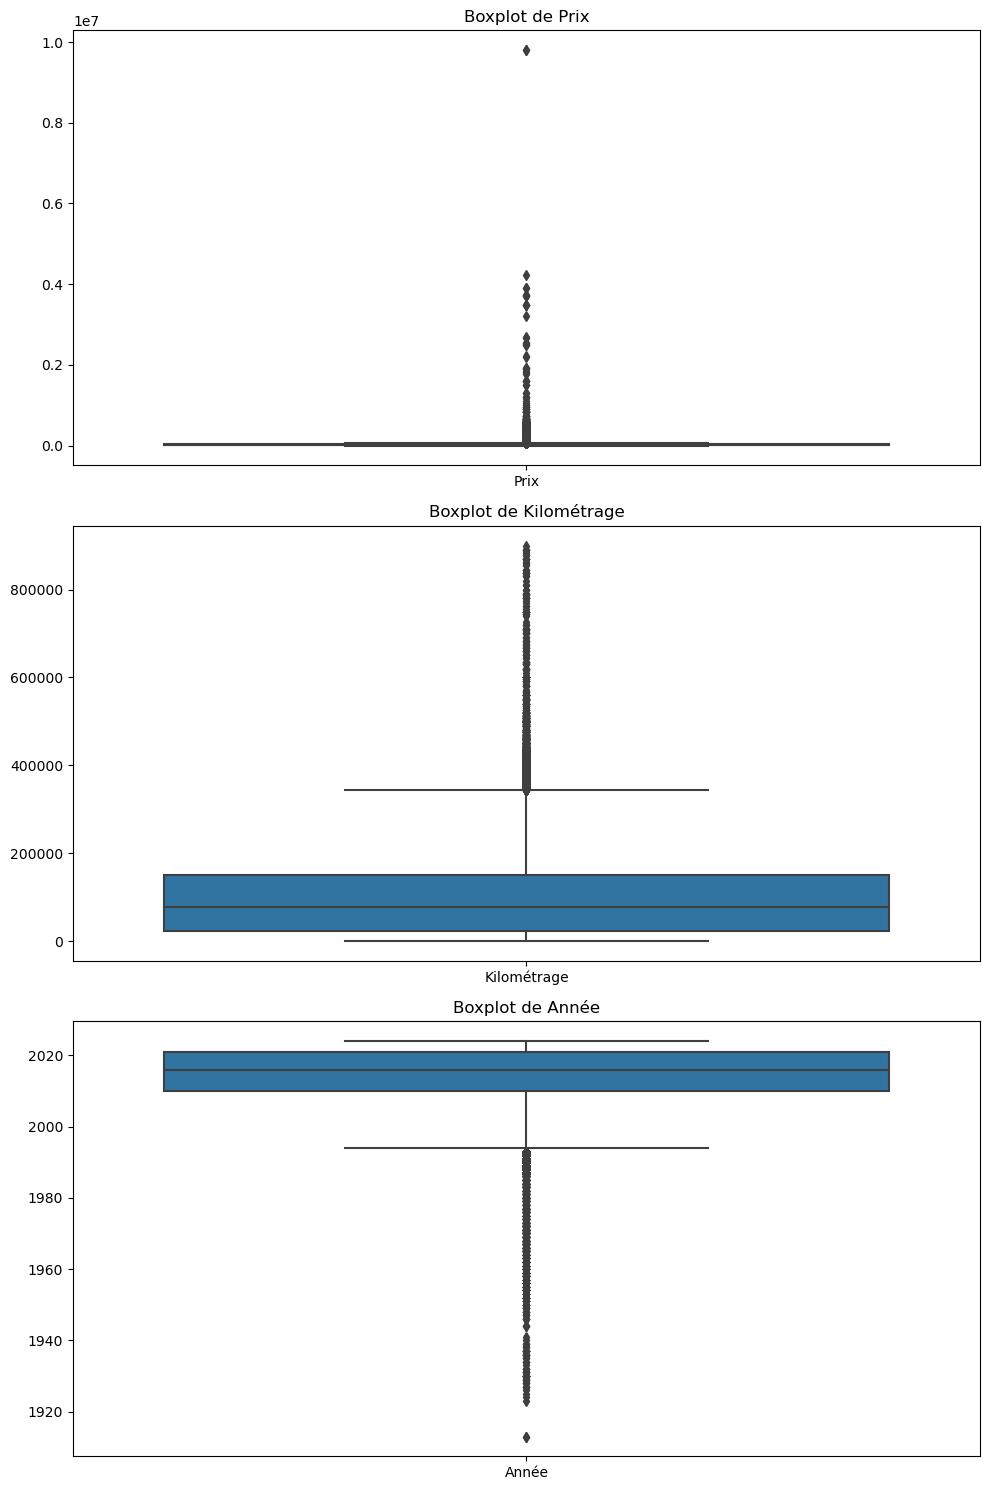

In [18]:


# Créer une figure avec trois sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Boxplot de la colonne "Prix"
sns.boxplot(ax=axes[0], data=df[['Prix']])
axes[0].set_title('Boxplot de Prix')

# Boxplot de la colonne "Kilométrage"
sns.boxplot(ax=axes[1], data=df[['Kilométrage']])
axes[1].set_title('Boxplot de Kilométrage')

# Boxplot de la colonne "Année"
sns.boxplot(ax=axes[2], data=df[['Année']])
axes[2].set_title('Boxplot de Année')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


#### Observation

Suite à cette analyse descriptive et ces plots , on se rend compte d'outliers .
Pour les gérer , on va procéder sur la methode IQR ( inter quartile)

### Gestion des outliers 

In [19]:




# Supprimer les outliers basés sur l'écart interquartile (IQR)
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les données pour exclure les outliers
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    
    return dataframe

# Supprimer les outliers pour la colonne "Prix"
df = remove_outliers_iqr(df, 'Prix')

# Supprimer les outliers pour la colonne "Kilométrage"
df = remove_outliers_iqr(df, 'Kilométrage')

# Supprimer les outliers pour la colonne "Année"
df = remove_outliers_iqr(df, 'Année')



In [20]:
df.describe()

Date           Prix    Kilométrage  \
count                         130188  130188.000000  130188.000000   
mean   2023-03-03 14:34:09.368605184   18793.980474   99493.628914   
min              2019-01-15 00:00:00     153.000000      10.000000   
25%              2022-05-21 00:00:00    7348.000000   30000.000000   
50%              2023-05-18 00:00:00   15237.000000   82000.000000   
75%              2023-11-07 00:00:00   26900.000000  154305.000000   
max              2024-01-06 00:00:00   63208.000000  352900.000000   
std                              NaN   14245.203678   84015.768963   

               Année  
count  130188.000000  
mean     2015.132286  
min      1995.000000  
25%      2011.000000  
50%      2016.000000  
75%      2020.000000  
max      2024.000000  
std         6.452570

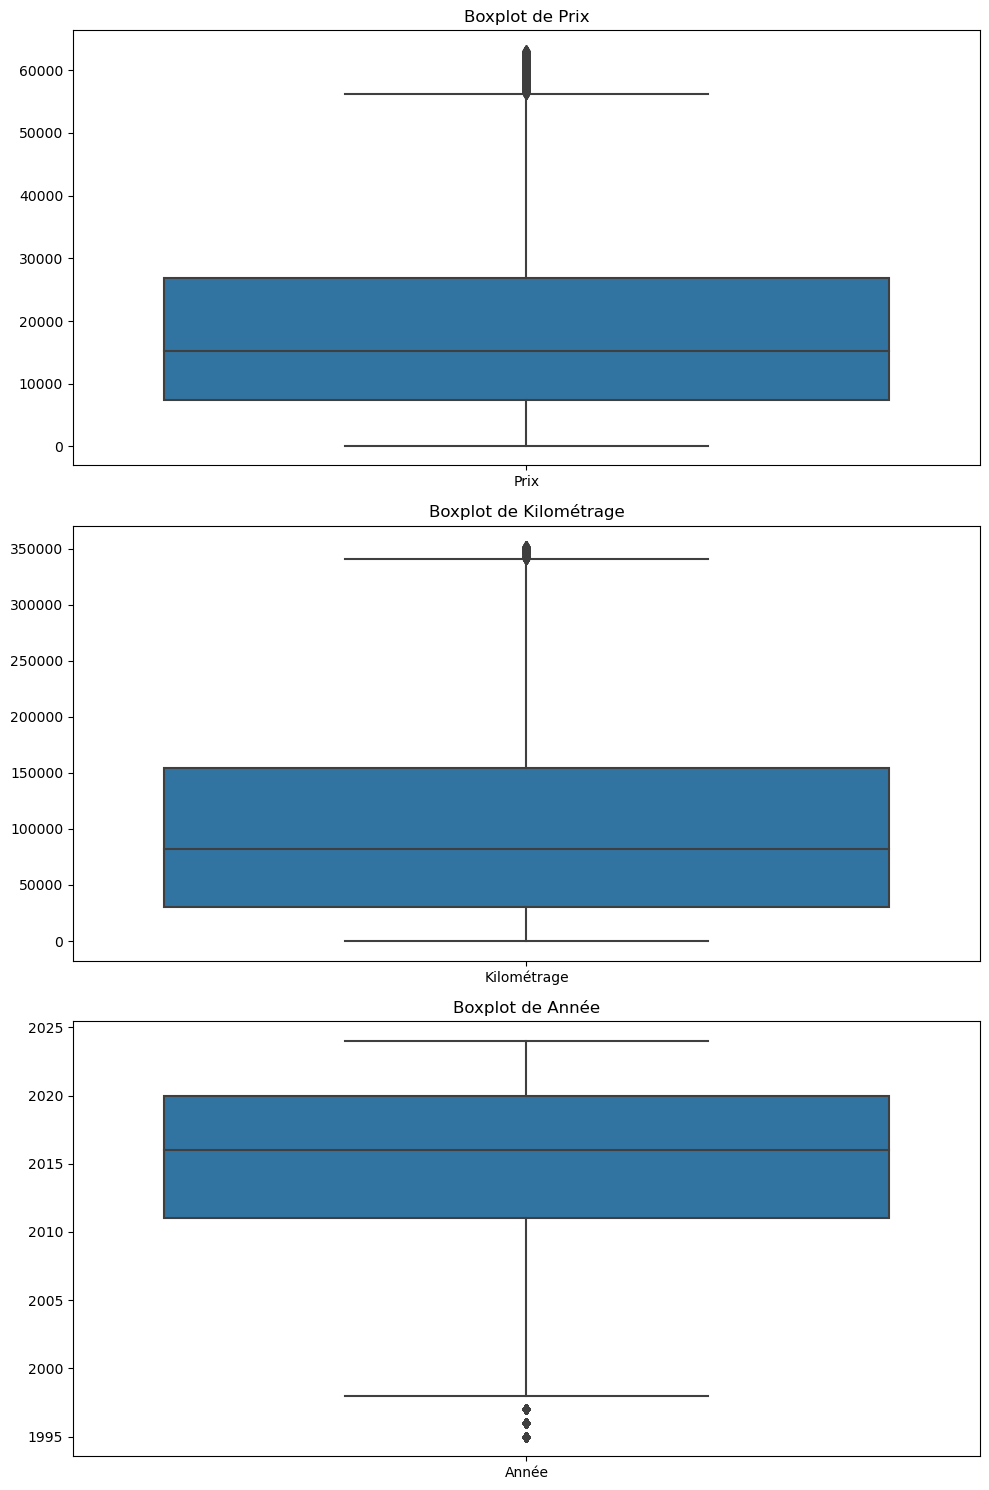

In [21]:


# Créer une figure avec trois sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Boxplot de la colonne "Prix"
sns.boxplot(ax=axes[0], data=df[['Prix']])
axes[0].set_title('Boxplot de Prix')

# Boxplot de la colonne "Kilométrage"
sns.boxplot(ax=axes[1], data=df[['Kilométrage']])
axes[1].set_title('Boxplot de Kilométrage')

# Boxplot de la colonne "Année"
sns.boxplot(ax=axes[2], data=df[['Année']])
axes[2].set_title('Boxplot de Année')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


#### Observation

Les valeurs paraissent plus centrées et cohérentes pour les étudiers ( moins doutlier , et boites à moustache bien moustache)


### Proportions sur notre populations

On a plusieurs populations de voitures par continent , on cherche à déterminer le nombre de voiture par continent. Cela nous permettra de décrire avec plus de précision et être plus rigoureux dans notre analyse

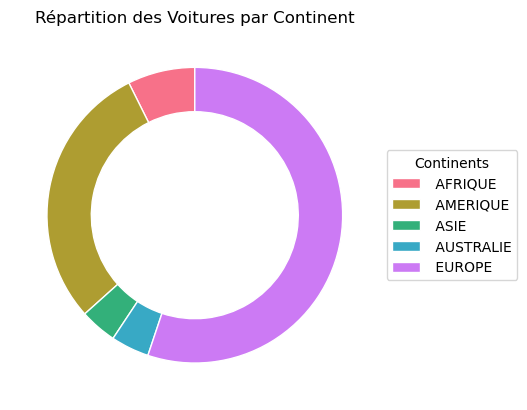

In [22]:
# Groupez par continent +   nombre total de voitures
total_cars_by_continent = df.groupby('Continent').size()

names = total_cars_by_continent.index
size = total_cars_by_continent.values


colors = sns.color_palette("husl", len(names))


fig, ax = plt.subplots()
fig.patch.set_facecolor('white')


my_circle = plt.Circle((0, 0), 0.7, color='white')


wedges, texts, autotexts = ax.pie(size, autopct='', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)


ax.legend(wedges, names, title='Continents', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Répartition des Voitures par Continent')


plt.show()


#### Observation 

On voit que nos données sont majoritairement Européennes , donc lors de notre analyse , on devra prendre cela en compte

# Visualisations

Plan d'action d'étude du marché de l'automobile:
-
-

### Présence des modèles dans le dataset

In [23]:

# Concatvaleurs dee 'marque'
text = ' '.join(df['Marque'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Les marques Présentent dans le dataSet')
plt.show()

NameError: name 'WordCloud' is not defined

### Analyse des prix

Compararer le prix moyen et la distribution de prix - Marché

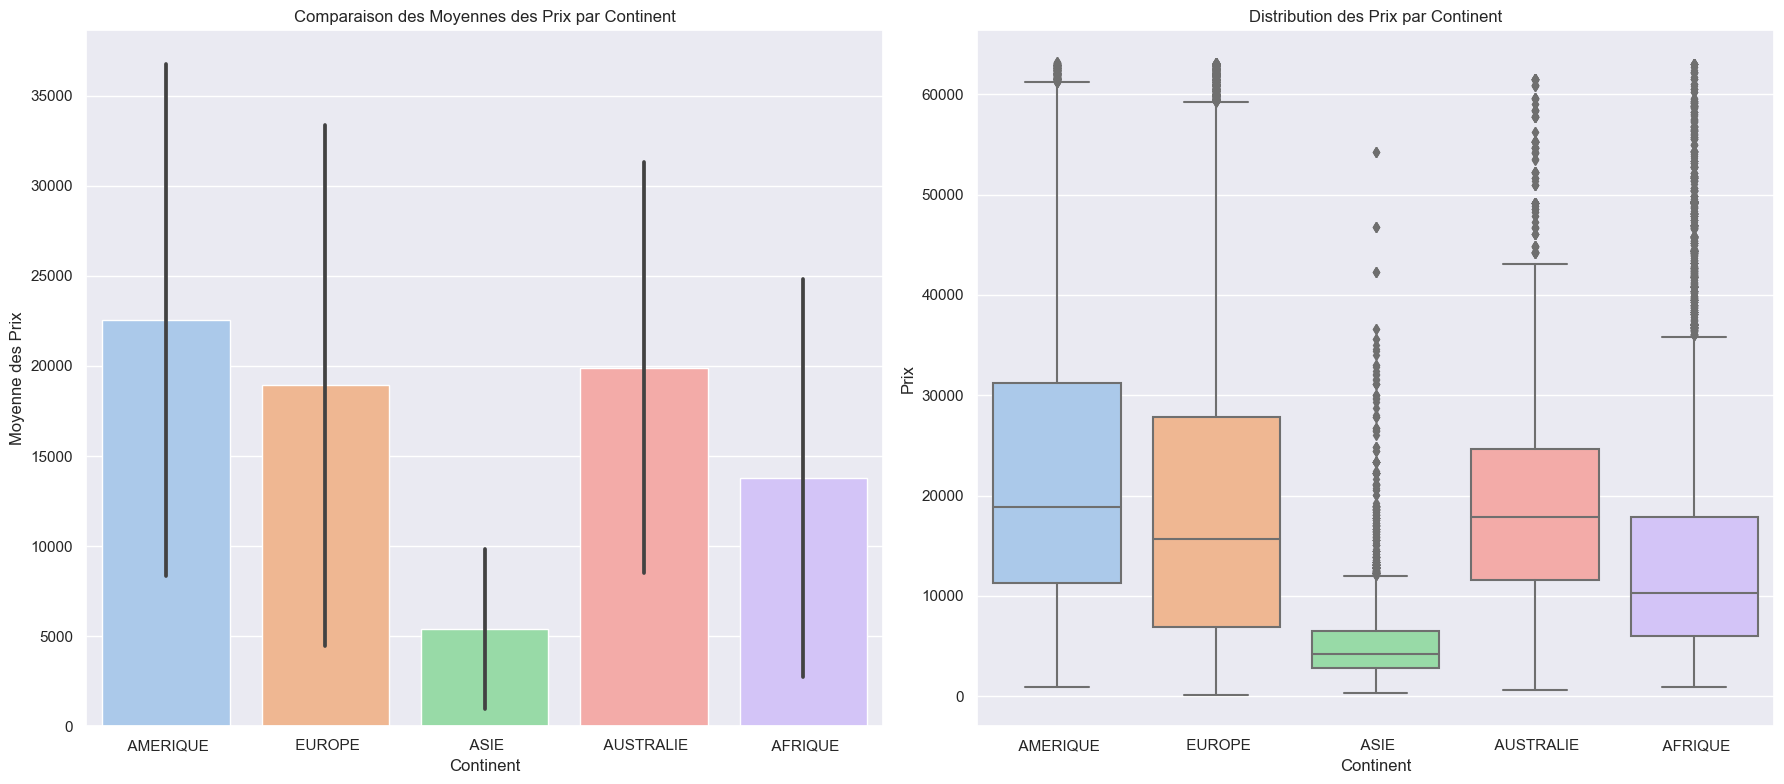

In [ ]:


# Utilisez le style Seaborn avec un fond noir
sns.set(style='darkgrid')

# Comparaison des moyennes des prix par continent
plt.figure(figsize=(18, 8))

# Graphique des moyennes des prix par continent avec couleurs funky
plt.subplot(1, 2, 1)
sns.barplot(x='Continent', y='Prix', data=df, ci='sd', palette='pastel')
plt.title('Comparaison des Moyennes des Prix par Continent')
plt.xlabel('Continent')
plt.ylabel('Moyenne des Prix')

# Identification des pays ou continents avec les prix les plus élevés et les plus bas
plt.subplot(1, 2, 2)
sns.boxplot(x='Continent', y='Prix', data=df, palette='pastel')
plt.title('Distribution des Prix par Continent')
plt.xlabel('Continent')
plt.ylabel('Prix')

plt.tight_layout()
plt.show()


#### Observation
On remarque que l' Amérique à les prix moyens les plus élevé et la plus grande dispersion.
Europe et Australie sont dans la meme dynamique suivie par l'Afrique
L'Asie semble bien bien en dessous des autres continents

### Distribution des marques - Analyse popularité

Le but sera d'analyser: 

    - Identifiez les marques les plus fréquemment répertoriées.
    - Analysez la distribution des marques par continent.
    - Créez des graphiques pour visualiser les parts de marché des différentes marques.

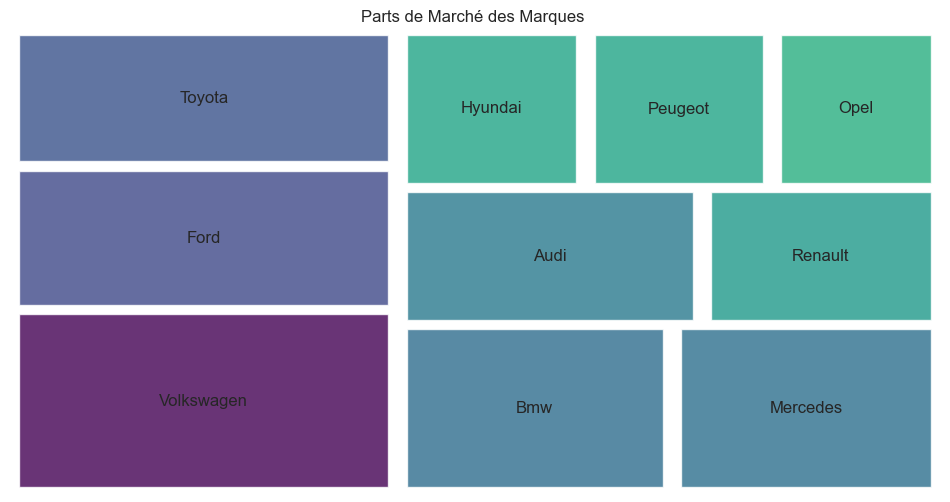

In [ ]:
# Treemap des marques
brands_market_share = df['Marque'].value_counts(normalize=True).head(10)


plt.figure(figsize=(12, 6))


sizes = brands_market_share.values
labels = brands_market_share.index


colors = plt.cm.viridis_r(sizes / sizes.max())

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, pad=True)
plt.title('Parts de Marché des Marques ')
plt.axis('off')
plt.show()


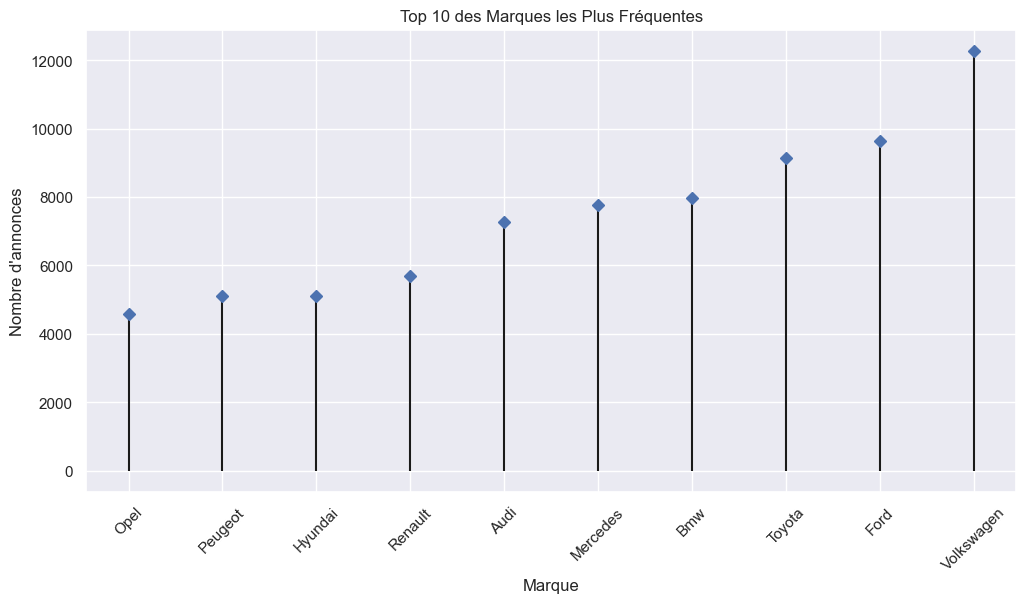

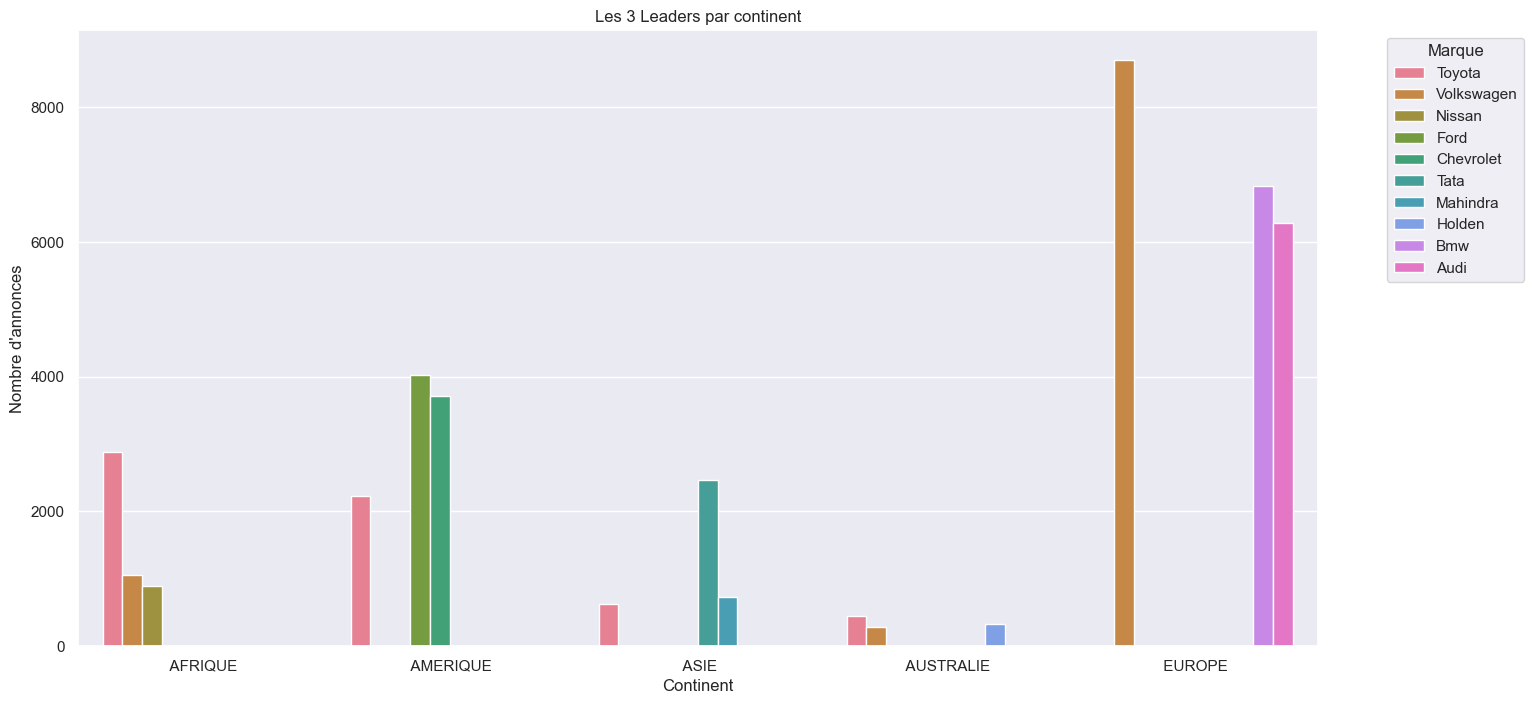

In [ ]:
# Identifiez les marques les plus fréquemment répertoriées
top_brands = df['Marque'].value_counts().head(10)

# Triez les données pour le diagramme en tiges
ordered_df = top_brands.reset_index().rename(columns={'index': 'Marque', 'Marque': 'Count'})
ordered_df = ordered_df.sort_values(by='Count')

# Inversez la palette de couleurs pour assombrir à mesure que la fréquence augmente
palette = sns.color_palette("viridis_r", len(ordered_df))

# Créez un diagramme en tiges avec une palette de couleurs inversée
plt.figure(figsize=(12, 6))
plt.stem(ordered_df['Count'], linefmt='k-', markerfmt='D', basefmt=' ')
plt.xticks(range(len(ordered_df)), ordered_df['Marque'])
plt.title('Top 10 des Marques les Plus Fréquentes')
plt.xlabel('Marque')
plt.ylabel('Nombre d\'annonces')
plt.xticks(rotation=45)
plt.show()

# Identifier les top 3 marques par continent
top_brands_by_continent = df.groupby(['Continent', 'Marque']).size().reset_index(name='Count')
top_brands_by_continent = top_brands_by_continent.sort_values(by=['Continent', 'Count'], ascending=[True, False])
top_brands_by_continent = top_brands_by_continent.groupby('Continent').head(3)

# Identifier les top 3 marques par continent
top_brands_by_continent = df.groupby(['Continent', 'Marque']).size().reset_index(name='Count')
top_brands_by_continent = top_brands_by_continent.sort_values(by=['Continent', 'Count'], ascending=[True, False])
top_brands_by_continent = top_brands_by_continent.groupby('Continent').head(3)

# Créer un graphique de comptage pour le top 3 des marques par continent avec des couleurs distinctes
palette = sns.color_palette("husl", n_colors=top_brands_by_continent['Marque'].nunique())
plt.figure(figsize=(16, 8))
sns.barplot(x='Continent', y='Count', hue='Marque', data=top_brands_by_continent, palette=palette)
plt.title('Les 3 Leaders par continent')
plt.xlabel('Continent')
plt.ylabel('Nombre d\'annonces')
plt.legend(title='Marque', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





#### Observation

Volkswagen lead le marché , ford et toyota suivent de peu

On remarque aussi que beaucoup de marques Européennes Lead le marché ( normal car on beaucoup plus de données européennes)

De plus on voit que Toyota est présent dans presque tout les continents 

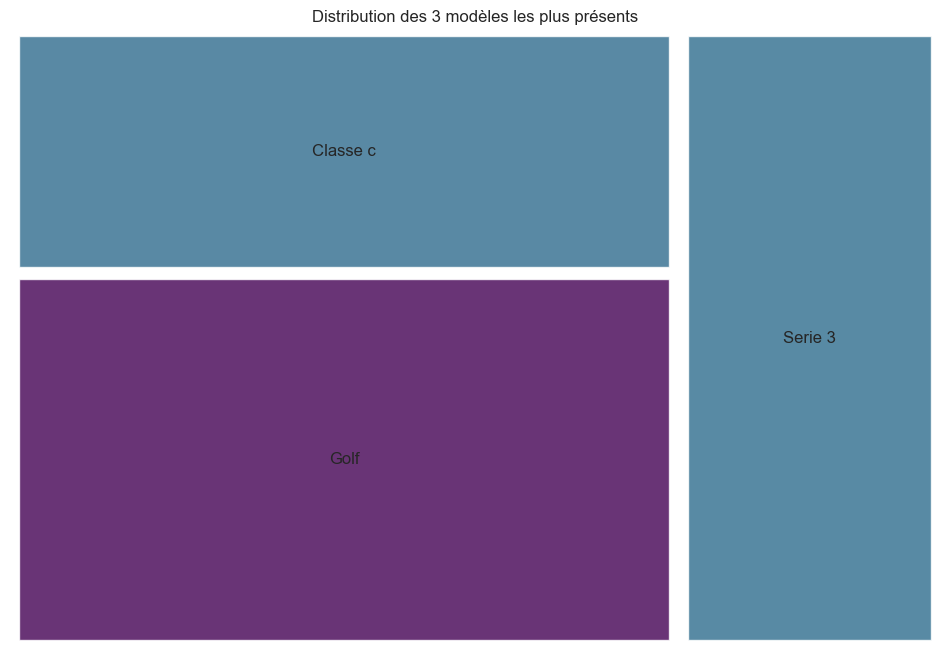

In [ ]:
# Obtenir les modèles triés par fréquence
sorted_modeles = df['Modele'].value_counts().index

# Sélectionner les 3 premiers et les 3 derniers modèles
selected_modeles = list(sorted_modeles[:3])

# Filtrer le DataFrame pour inclure uniquement ces modèles
df_selected_modeles = df[df['Modele'].isin(selected_modeles)]

# Treemap pour la colonne 'Modele'
plt.figure(figsize=(12, 8))

# Transform data for treemap
sizes_modeles = df_selected_modeles['Modele'].value_counts().values
labels_modeles = df_selected_modeles['Modele'].value_counts().index
colors_modeles = plt.cm.viridis_r(sizes_modeles / sizes_modeles.max())

# Plot treemap
squarify.plot(sizes=sizes_modeles, label=labels_modeles, color=colors_modeles, alpha=0.8, pad=True)
plt.title('Distribution des 3 modèles les plus présents')
plt.axis('off')
plt.show()




  #### Observationd des tops 3
    Marque des Golfs : Volkswagen
    Marque des Classe C : Mercedes-Benz
    Marque des Série 3 : BMW

### Analyse des types de carburant :

- Étudiez la distribution des types de carburant.
- Comparez la préférence pour les carburants entre les continents.
- Identifiez les tendances émergentes en matière de carburant.

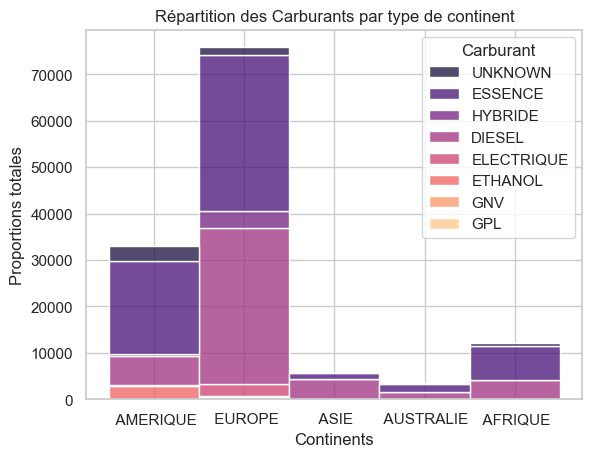

In [ ]:


sns.set(style="whitegrid")


df_fuel = df[['Carburant','Continent']]


fuel_counts = df_fuel['Carburant'].value_counts()


sns.histplot(data=df_fuel, x="Continent", hue="Carburant", multiple="stack", palette="magma")


plt.xlabel('Continents')
plt.ylabel('Proportions totales')
plt.title('Répartition des Carburants par type de continent')


plt.show()


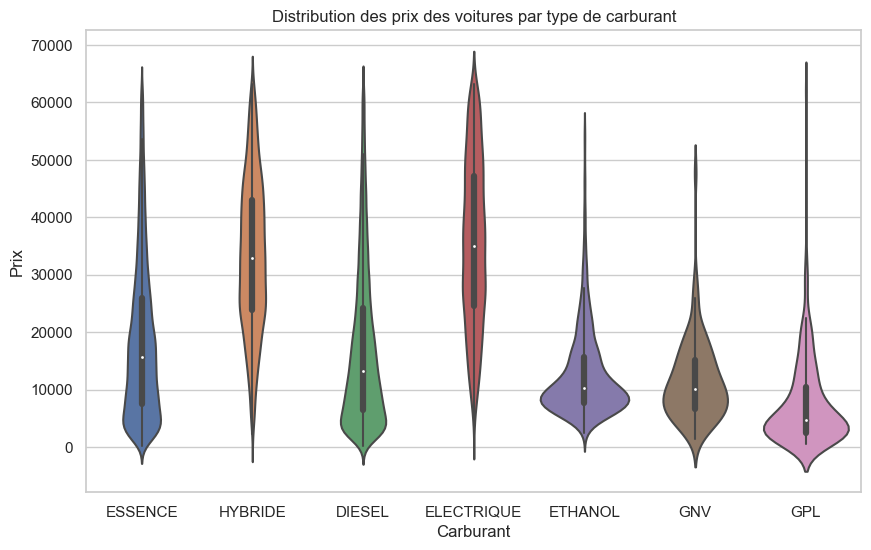

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Carburant', y='Prix', data=df)
plt.title('Distribution des prix des voitures par type de carburant')
plt.xlabel('Carburant')
plt.ylabel('Prix')
plt.show()


### Analyse du Kilométrage : 

- Analysez la distribution du kilométrage des voitures.
- Identifiez les tendances de kilométrage par marque, modèle et année.
- Explorez la corrélation entre le kilométrage et le prix.

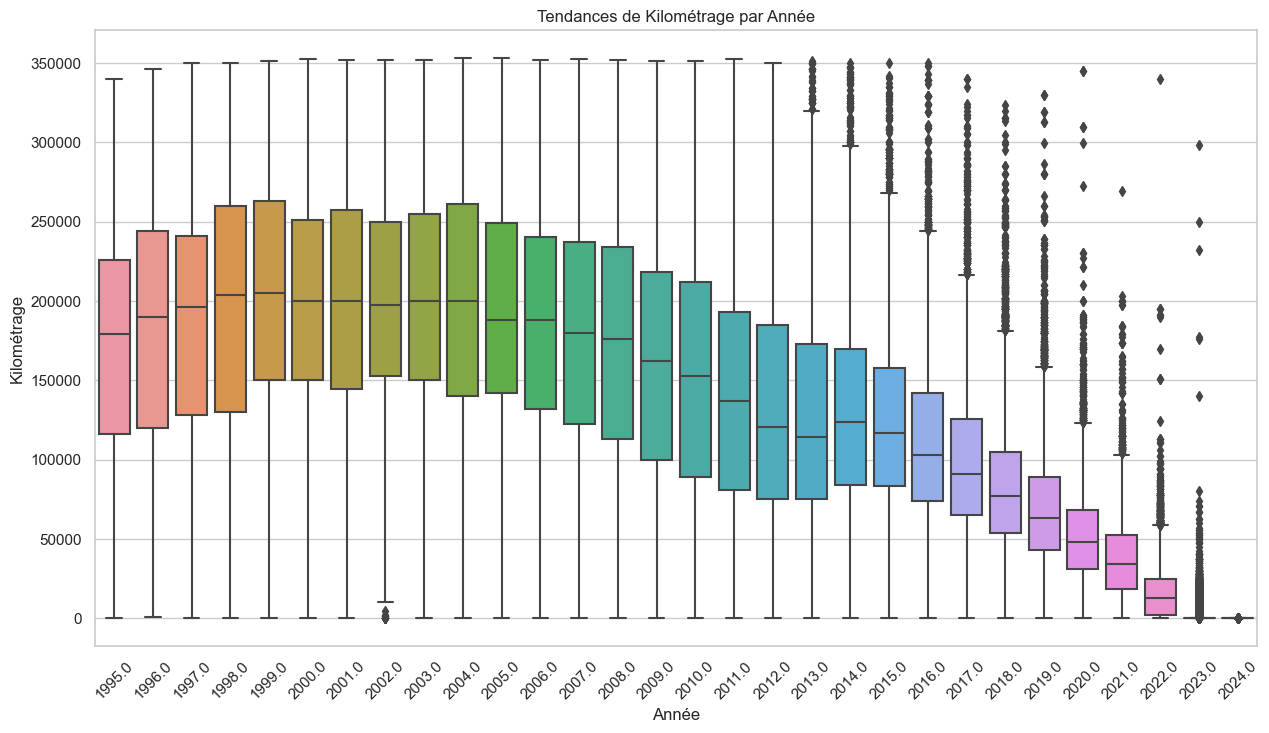

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Année', y='Kilométrage', data=df)
plt.title('Tendances de Kilométrage par Année')
plt.xlabel('Année')
plt.ylabel('Kilométrage')
plt.xticks(rotation=45)
plt.show()

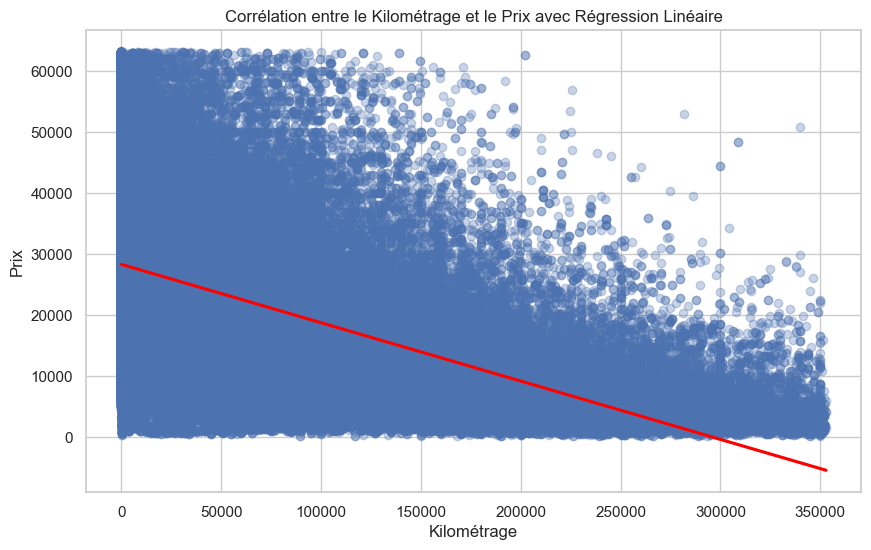

In [ ]:
# Corrélation entre le kilométrage et le prix avec une ligne de régression
plt.figure(figsize=(10, 6))
sns.regplot(x='Kilométrage', y='Prix', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Corrélation entre le Kilométrage et le Prix avec Régression Linéaire')
plt.xlabel('Kilométrage')
plt.ylabel('Prix')
plt.show()

#### Observation

Sans grande surprise , plus le kilométrage augmente , plus le prix baisse

### Analyse Temporelle

- Analysez comment les prix et la disponibilité des voitures changent au fil du temps.
- Identifiez les tendances saisonnières ou annuelles.

##### Evolution des meilleurs marques

In [ ]:


# Find the 3 most common car brands
top3_most_common_brands = df['Marque'].value_counts().nlargest(3).index

# Filter the DataFrame for the 3 most common car brands
df_top3_most_common = df[df['Marque'].isin(top3_most_common_brands)]

# Drop rows with missing or infinite values in 'Prix'
df_top3_most_common = df_top3_most_common.dropna(subset=['Prix'])
df_top3_most_common = df_top3_most_common.replace([np.inf, -np.inf], np.nan).dropna(subset=['Prix'])

# Group by date and calculate the mean price for the 3 most common brands
mean_price_by_date_top3_most_common = df_top3_most_common.groupby(['Date', 'Marque'])['Prix'].mean().reset_index()

# Create an empty figure
fig_avg_price_by_date_top3_most_common = go.Figure()

# Perform robust linear regression for each brand
for marque in top3_most_common_brands:
    df_marque = mean_price_by_date_top3_most_common[mean_price_by_date_top3_most_common['Marque'] == marque]

    # Drop rows with missing or infinite values in 'Prix'
    df_marque = df_marque.dropna(subset=['Prix'])
    df_marque = df_marque.replace([np.inf, -np.inf], np.nan).dropna(subset=['Prix'])

    # Fit a robust linear regression model
    X = sm.add_constant(df_marque.index)
    y = df_marque['Prix']
    model = sm.RLM(y, X).fit()

    # Add the trendline
    fig_avg_price_by_date_top3_most_common.add_trace(go.Scatter(
        x=df_marque['Date'],
        y=model.predict(X),
        mode='lines',
        name=f'Evolution de  - {marque}',
        line=dict(width=2),
    ))

# Update layout
fig_avg_price_by_date_top3_most_common.update_layout(
    title='TREND DES TOP 3 MARQUES PRESENTES SUR LE MARCHE',
    xaxis_title='Date',
    yaxis_title='Average Price'
)

# Show the plot
fig_avg_price_by_date_top3_most_common.show()


##### Evolution du prix de la Golf

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Find the most present car model
most_present_model = df['Modele'].value_counts().idxmax()

# Filter the DataFrame for the most present car model
df_most_present_model = df[df['Modele'] == most_present_model]

# Group by date and calculate the mean price
mean_price_by_date = df_most_present_model.groupby('Date')['Prix'].mean().reset_index()

# Perform linear regression
coefficients = np.polyfit(mean_price_by_date.index, mean_price_by_date['Prix'], 1)
trendline = np.poly1d(coefficients)

# Create line chart for the average price at each date
fig_avg_price_by_date = px.line(
    mean_price_by_date,
    x='Date',
    y='Prix',
    labels={'Prix': 'Average Price', 'Date': 'Date'},
    title=f'Average Car Price Over Time for {most_present_model}'
)

# Add the scatter plot
fig_avg_price_by_date.add_trace(go.Scatter(
    x=mean_price_by_date['Date'],
    y=mean_price_by_date['Prix'],
    mode='markers',
    name='Actual Prices'
))

# Add the trendline
fig_avg_price_by_date.add_trace(go.Scatter(
    x=mean_price_by_date['Date'],
    y=trendline(mean_price_by_date.index),
    mode='lines',
    name='Trendline',
    line=dict(color='red', width=2),
))

# Add annotations for the trendline equation and coefficients
equation = f'Trendline: {round(coefficients[0], 2)}x + {round(coefficients[1], 2)}'
coeff_annotation = f'Coefficients: {round(coefficients[0], 2)} (slope), {round(coefficients[1], 2)} (intercept)'

fig_avg_price_by_date.add_annotation(
    go.layout.Annotation(
        text=equation,
        xref="paper",
        yref="paper",
        x=0.95,
        y=0.9,
        showarrow=False,
    )
)

fig_avg_price_by_date.add_annotation(
    go.layout.Annotation(
        text=coeff_annotation,
        xref="paper",
        yref="paper",
        x=0.95,
        y=0.85,
        showarrow=False,
    )
)

# Show the plot
fig_avg_price_by_date.show()


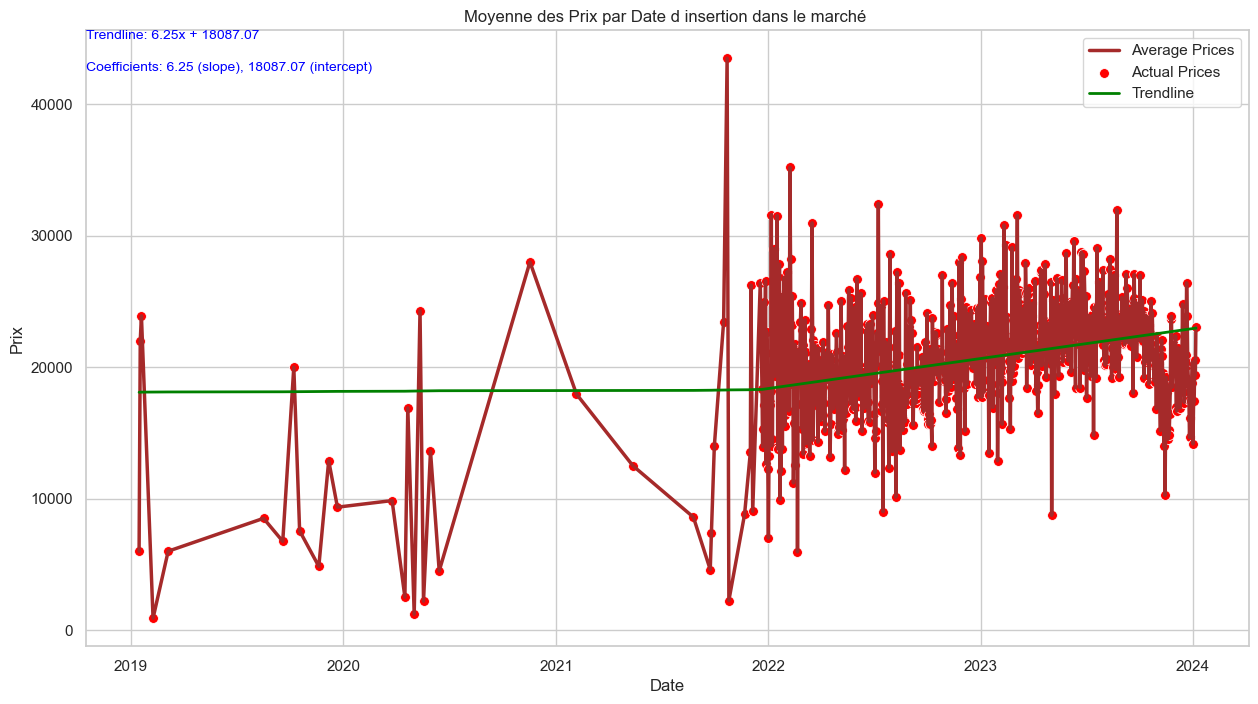

In [ ]:


# Calculer la moyenne des prix pour chaque date
moyennes_par_date = df.groupby('Date')['Prix'].mean().reset_index()

# Perform linear regression
coefficients = np.polyfit(moyennes_par_date.index, moyennes_par_date['Prix'], 1)
trendline = np.poly1d(coefficients)

# Graphique de ligne avec une observation par date
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Prix', data=moyennes_par_date, linewidth=2.5, color='brown', label='Average Prices')

# Add scatter plot points
sns.scatterplot(x='Date', y='Prix', data=moyennes_par_date, color='red', s=50, label='Actual Prices')

# Add the trendline
plt.plot(moyennes_par_date['Date'], trendline(moyennes_par_date.index), color='green', linewidth=2, label='Trendline')

# Add legend
plt.legend()

# Add annotations for the trendline equation and coefficients
equation = f'Trendline: {round(coefficients[0], 2)}x + {round(coefficients[1], 2)}'
coeff_annotation = f'Coefficients: {round(coefficients[0], 2)} (slope), {round(coefficients[1], 2)} (intercept)'

plt.annotate(equation, xy=(0, 1), xycoords='axes fraction', ha='left', va='top', fontsize=10, color='blue')
plt.annotate(coeff_annotation, xy=(0, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, color='blue')

plt.title('Moyenne des Prix par Date d insertion dans le marché ')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.show()


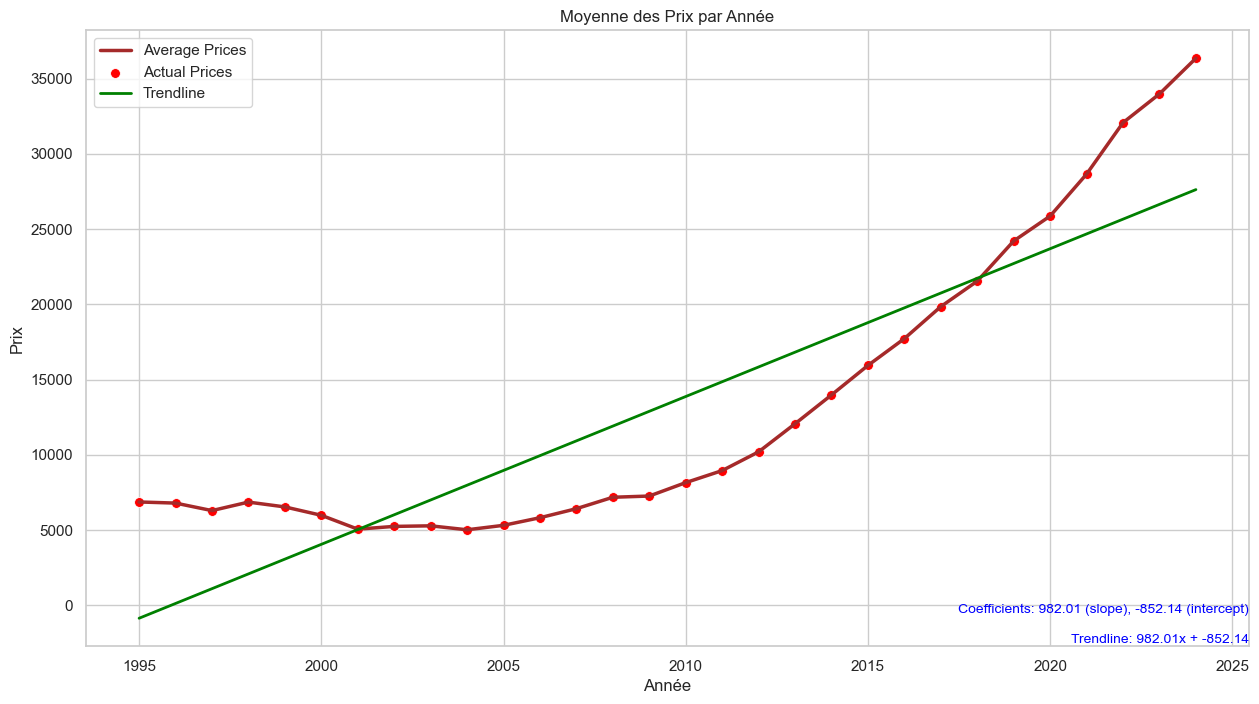

In [ ]:
# Calculer la moyenne des prix pour chaque année
moyennes_par_annee = df.groupby('Année')['Prix'].mean().reset_index()

# Sort DataFrame by 'Année' in ascending order
moyennes_par_annee = moyennes_par_annee.sort_values(by='Année', ascending=True)

# Perform linear regression
coefficients = np.polyfit(moyennes_par_annee.index, moyennes_par_annee['Prix'], 1)
trendline = np.poly1d(coefficients)

# Graphique de ligne avec une observation par année
plt.figure(figsize=(15, 8))
sns.lineplot(x='Année', y='Prix', data=moyennes_par_annee, linewidth=2.5, color='brown', label='Average Prices')

# Add scatter plot points
sns.scatterplot(x='Année', y='Prix', data=moyennes_par_annee, color='red', s=50, label='Actual Prices')

# Add the trendline
plt.plot(moyennes_par_annee['Année'], trendline(moyennes_par_annee.index), color='green', linewidth=2, label='Trendline')

# Add legend
plt.legend()

# Add annotations for the trendline equation and coefficients
equation = f'Trendline: {round(coefficients[0], 2)}x + {round(coefficients[1], 2)}'
coeff_annotation = f'Coefficients: {round(coefficients[0], 2)} (slope), {round(coefficients[1], 2)} (intercept)'

# Update xy coordinates for annotations
plt.annotate(equation, xy=(1, 0), xycoords='axes fraction', ha='right', va='bottom', fontsize=10, color='blue')
plt.annotate(coeff_annotation, xy=(1, 0.05), xycoords='axes fraction', ha='right', va='bottom', fontsize=10, color='blue')

plt.title('Moyenne des Prix par Année')
plt.xlabel('Année')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

#### Observation

Sur une entrée de marchée de la vente d'occasion , les prix ont augméntés progressivement

Cause possible : 
    inflation
    
Néanmoins sur levolution des prixs une fois sur le marché , 
on se doit de visualiser à lenvers , on se rend compte bien de l'argus

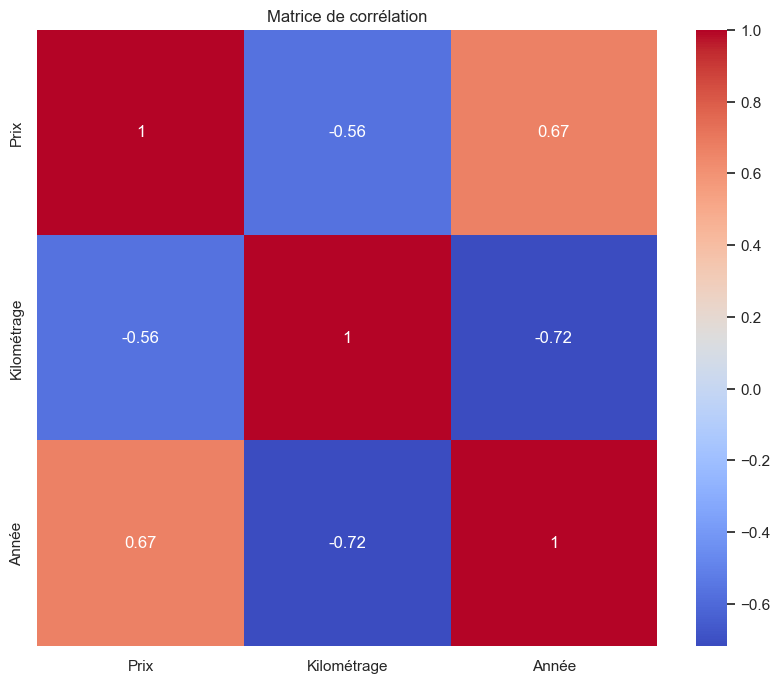

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Prix', 'Kilométrage', 'Année']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


# PluS
pip install geopy


In [ ]:

manual_mapping = {
    'ETATS-UNIS': 'United States of America',
    'CANADA': 'Canada',
    'COLOMBIE': 'Colombia',
    'ARGENTINE': 'Argentina',
    'MEXIQUE': 'Mexico',
    'BRESIL': 'Brazil',
    'CHILI': 'Chile',
    'PEROU': 'Peru',
    'CHINE': 'China',
    'JAPON': 'Japan',
    'COREEDUSUD': 'South Korea',
    'INDE': 'India',
    'MALAISIE': 'Malaysia',
    'SINGAPOUR': 'Singapore',
    'KOWEÏT': 'Kuwait',
    'CAMEROUN': 'Cameroon',
    'BAHREÏN': 'Bahrain',
    'QATAR': 'Qatar',
    'COREE DU SUD': 'South Korea',
    'OMAN': 'Oman',
    'POLOGNE': 'Poland',
    'BULGARIE': 'Bulgaria',
    'ITALIE': 'Italy',
    'FRANCE': 'France',
    'RÉPUBLIQUETCHÈQUE': 'Czechia',
    'SERBIE': 'Serbia',
    'ESPAGNE': 'Spain',
    'PAYS-BAS': 'Netherlands',
    'ALLEMAGNE': 'Germany',
    'SUISSE': 'Switzerland',
    'AUTRICHE': 'Austria',
    'PORTUGAL': 'Portugal',
    'GRÈCE': 'Greece',
    'RUSSIE': 'Russia',
    'ROYAUME-UNI': 'United Kingdom',
    'RÉPUBLIQUE TCHÈQUE': 'Czechia',
    'IRLANDE': 'Ireland',
    'ESTONIE': 'Estonia',
    'HONGRIE': 'Hungary',
    'LETTONIE': 'Latvia',
    'LITUANIE': 'Lithuania',
    'NORVÈGE': 'Norway',
    'CROATIE': 'Croatia',
    'DANEMARK': 'Denmark',
    'ROUMANIE': 'Romania',
    'SUÈDE': 'Sweden',
    'LIMBOURG': 'Luxembourg',
    'FLANDRE-OCCIDENTALE': 'Belgium',
    'LUXEMBOURG': 'Luxembourg',
    'ANDORRE': 'Andorra',
    'MONACO': 'Monaco',
    'JERSEY': 'Jersey',
    'SAINT-MARIN': 'San Marino',
    'BOSNIE-HERZÉGOVINE': 'Bosnia and Herz.',
    'GIBRALTAR': 'Gibraltar',
    'ALBANIE': 'Albania',
    'RÉPUBLIQUE DE MACÉDOINE': 'North Macedonia',
    'MOLDAVIE': 'Moldova',
    'ISLANDE': 'Iceland',
    'GEORGIE': 'Georgia',
    'LIECHTENSTEIN': 'Liechtenstein',
    'MALTE': 'Malta',
    'RÉPUBLIQUEDEMACÉDOINE': 'North Macedonia',
    'HAINAUT': 'Belgium',
    'NAMUR': 'Belgium',
    'ANVERS': 'Belgium',
    'CHYPRE': 'Cyprus',
    'AUSTRALIE': 'Australia',
    'NOUVELLE-ZÉLANDE': 'New Zealand',
    'MAURICE': 'Mauritius',
    'AFRIQUE DU SUD': 'South Africa',
    'MAROC': 'Morocco',
    'KENYA': 'Kenya',
    'SENEGAL': 'Senegal',
    "COTE D'IVOIRE": "Côte d'Ivoire",
    'AFRIQUEDUSUD': 'South Africa',
    'EMIRATSARABESUNIS': 'United Arab Emirates',
    "COTED'IVOIRE": "Côte d'Ivoire"
}

# Appliquer la correspondance manuelle
df['Location'] = df['Location'].map(manual_mapping)

# Vérifier à nouveau les valeurs uniques après la mise à jour
print(f"Locations in DataFrame: {df['Location'].unique()}")






Locations in DataFrame: ['Canada' 'Colombia' 'Brazil' 'France' 'Mexico' 'Argentina' 'Chile'
 'United States of America' 'Andorra' 'Bosnia and Herz.' 'Gibraltar'
 'Moldova' 'Georgia' 'Cameroon' 'Oman' 'China' 'Mauritius' 'Japan'
 'Malaysia' 'New Zealand' 'Monaco' 'Germany' 'Belgium' 'Spain' 'Italy'
 'Luxembourg' 'Switzerland' 'South Africa' 'Australia' 'Austria'
 'Bulgaria' 'Croatia' 'Denmark' 'Netherlands' 'Romania' 'Ireland'
 'Morocco' 'United Arab Emirates' 'Estonia' 'Hungary' 'India' 'Kenya'
 'Latvia' 'Lithuania' 'Norway' 'Poland' 'Portugal' 'United Kingdom'
 'Russia' 'Czechia' 'Senegal' 'Serbia' 'Sweden' 'Greece' 'Cyprus'
 'Liechtenstein' 'Malta' 'Peru' "Côte d'Ivoire"]


In [ ]:
# Group by location (country in this case) and calculate the mean price
mean_price_by_location = df.groupby('Location')['Prix'].mean().reset_index()
print(mean_price_by_location)

                    Location          Prix
0                    Andorra  11250.000000
1                  Argentina  22718.982006
2                  Australia  19925.507383
3                    Austria  25462.365703
4                    Belgium  21563.522166
5           Bosnia and Herz.  20336.250000
6                     Brazil  14985.774660
7                   Bulgaria  12597.339888
8                   Cameroon    275.000000
9                     Canada  25230.671137
10                     Chile  17557.884810
11                     China  33446.333333
12                  Colombia  24008.386806
13                   Croatia  20928.318208
14                    Cyprus  21090.551483
15                   Czechia   9972.812500
16             Côte d'Ivoire  17172.185841
17                   Denmark  24148.911903
18                   Estonia   9722.239355
19                    France  16703.501189
20                   Georgia  33249.500000
21                   Germany  21445.954156
22         

## Graph Prix Moyen par pays

In [ ]:
# Check if Location values are present in the GeoJSON file
with open('world-countries.json', 'r', encoding='utf-8') as file:
    europe_geojson = json.load(file)

geojson_features = [feature['properties']['name'] for feature in europe_geojson['features']]
missing_locations = set(df['Location']) - set(geojson_features)

if missing_locations:
    print(f"Warning: The following locations are missing in the GeoJSON file: {missing_locations}")

# Print debug information
print(f"Locations in DataFrame: {df['Location'].unique()}")
print(f"Locations in GeoJSON: {geojson_features}")


Locations in DataFrame: ['Canada' 'Colombia' 'Brazil' 'France' 'Mexico' 'Argentina' 'Chile'
 'United States of America' 'Andorra' 'Bosnia and Herz.' 'Gibraltar'
 'Moldova' 'Georgia' 'Cameroon' 'Oman' 'China' 'Mauritius' 'Japan'
 'Malaysia' 'New Zealand' 'Monaco' 'Germany' 'Belgium' 'Spain' 'Italy'
 'Luxembourg' 'Switzerland' 'South Africa' 'Australia' 'Austria'
 'Bulgaria' 'Croatia' 'Denmark' 'Netherlands' 'Romania' 'Ireland'
 'Morocco' 'United Arab Emirates' 'Estonia' 'Hungary' 'India' 'Kenya'
 'Latvia' 'Lithuania' 'Norway' 'Poland' 'Portugal' 'United Kingdom'
 'Russia' 'Czechia' 'Senegal' 'Serbia' 'Sweden' 'Greece' 'Cyprus'
 'Liechtenstein' 'Malta' 'Peru' "Côte d'Ivoire"]
Locations in GeoJSON: ['Costa Rica', 'Nicaragua', 'Haiti', 'Dominican Rep.', 'El Salvador', 'Guatemala', 'Cuba', 'Honduras', 'United States of America', 'Canada', 'Mexico', 'Belize', 'Panama', 'Greenland', 'Bahamas', 'Trinidad and Tobago', 'Puerto Rico', 'Jamaica', 'Indonesia', 'Malaysia', 'Cyprus', 'India', 'China'

In [ ]:
import plotly.express as px
import json

# Group by location (country) and calculate the mean price
mean_price_by_location = df.groupby('Location')['Prix'].mean().reset_index()

# Check if Location values are present in the GeoJSON file
geojson_features = [feature['properties']['name'] for feature in europe_geojson['features']]
missing_locations = set(mean_price_by_location['Location']) - set(geojson_features)

if missing_locations:
    print(f"Warning: The following locations are missing in the GeoJSON file: {missing_locations}")

# Create a choropleth map using the mean price data
fig = px.choropleth(
    mean_price_by_location,
    geojson=europe_geojson,
    locations='Location',
    featureidkey='properties.name',
    color='Prix',
    color_continuous_scale='Reds',  # Set to the color scale you prefer
    hover_data=['Location', 'Prix'],
    title='Mean Car Price in Europe'
)




# Save the map
fig.write_html('car_price_choropleth_map_plotly.html')


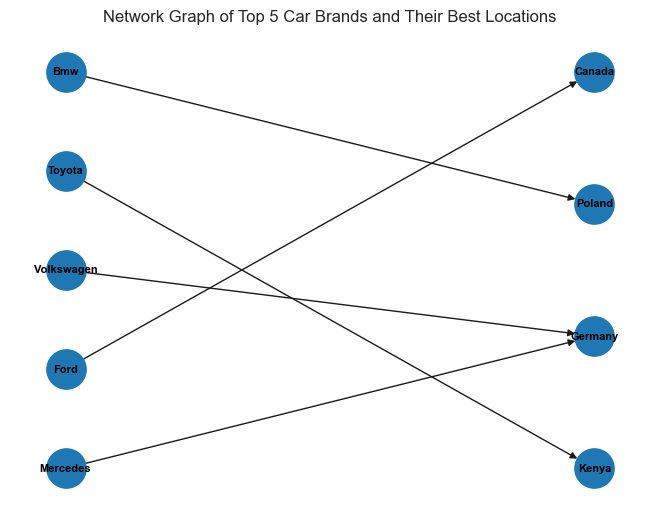

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the top 5 car brands based on the number of cars sold
top_brands = df['Marque'].value_counts().nlargest(5).index


G = nx.DiGraph()


G.add_nodes_from(top_brands, bipartite=0)


best_locations = set()


for brand in top_brands:
    best_location = df[df['Marque'] == brand]['Location'].value_counts().idxmax()
    best_locations.add(best_location)
    G.add_edge(brand, best_location)


G.add_nodes_from(best_locations, bipartite=1)


pos = nx.bipartite_layout(G, top_brands)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color='black', font_weight='bold')


plt.title('Network Graph of Top 5 Car Brands and Their Best Locations')
plt.show()


In [ ]:
df

Modele      Marque       Date Location     Prix Carburant  \
27            Equinox   Chevrolet 2023-11-24   Canada   2727.0      <NA>   
28           Ram 2500  Ram trucks 2023-11-27   Canada  23111.0      <NA>   
29      Grand caravan       Dodge 2023-11-10   Canada  23179.0      <NA>   
30             Tacoma      Toyota 2023-11-28   Canada  35382.0      <NA>   
31            Golf sw  Volkswagen 2023-12-10   Canada   4704.0   ESSENCE   
...               ...         ...        ...      ...      ...       ...   
158614         Indigo        Tata 2022-01-21    India   2726.0   ESSENCE   
158625         Xuv500    Mahindra 2022-01-21    India  11125.0    DIESEL   
158626         Pajero  Mitsubishi 2022-01-21    India  23363.0    DIESEL   
158627          Manza        Tata 2022-01-21    India   3338.0    DIESEL   
158628           Xylo    Mahindra 2022-01-21    India   6675.0    DIESEL   

        Kilométrage   Année Boîte de vitesse Departements  Continent  
27         213000.0  2013.0             <NA>          A1K   AMERIQUE  
28         180000.0  2013.0             <NA>          A1K   AMERIQUE  
29          38700.0  2017.0             <NA>          A1A   AMERIQUE  
30          39000.0  2021.0             <NA>          A1A   AMERIQUE  
31         145000.0  2011.0      AUTOMATIQUE          A1A   AMERIQUE  
...             ...     ...              ...          ...        ...  
158614      58000.0  2010.0         MANUELLE            -       ASIE  
158625      66553.0  2012.0         MANUELLE            -       ASIE  
158626      45000.0  2013.0         MANUELLE            -       ASIE  
158627     107000.0  2010.0         MANUELLE            -       ASIE  
158628      38263.0  2011.0         MANUELLE            -       ASIE  

[130188 rows x 11 columns]

In [ ]:
from datetime import datetime  




df['Année'] = df['Année'].astype(int)


current_year = datetime.now().year


df['Age'] = current_year - df['Année']

df

Modele      Marque       Date Location     Prix Carburant  \
27            Equinox   Chevrolet 2023-11-24   Canada   2727.0      <NA>   
28           Ram 2500  Ram trucks 2023-11-27   Canada  23111.0      <NA>   
29      Grand caravan       Dodge 2023-11-10   Canada  23179.0      <NA>   
30             Tacoma      Toyota 2023-11-28   Canada  35382.0      <NA>   
31            Golf sw  Volkswagen 2023-12-10   Canada   4704.0   ESSENCE   
...               ...         ...        ...      ...      ...       ...   
158614         Indigo        Tata 2022-01-21    India   2726.0   ESSENCE   
158625         Xuv500    Mahindra 2022-01-21    India  11125.0    DIESEL   
158626         Pajero  Mitsubishi 2022-01-21    India  23363.0    DIESEL   
158627          Manza        Tata 2022-01-21    India   3338.0    DIESEL   
158628           Xylo    Mahindra 2022-01-21    India   6675.0    DIESEL   

        Kilométrage  Année Boîte de vitesse Departements  Continent  Age  
27         213000.0   2013             <NA>          A1K   AMERIQUE   11  
28         180000.0   2013             <NA>          A1K   AMERIQUE   11  
29          38700.0   2017             <NA>          A1A   AMERIQUE    7  
30          39000.0   2021             <NA>          A1A   AMERIQUE    3  
31         145000.0   2011      AUTOMATIQUE          A1A   AMERIQUE   13  
...             ...    ...              ...          ...        ...  ...  
158614      58000.0   2010         MANUELLE            -       ASIE   14  
158625      66553.0   2012         MANUELLE            -       ASIE   12  
158626      45000.0   2013         MANUELLE            -       ASIE   11  
158627     107000.0   2010         MANUELLE            -       ASIE   14  
158628      38263.0   2011         MANUELLE            -       ASIE   13  

[130188 rows x 12 columns]

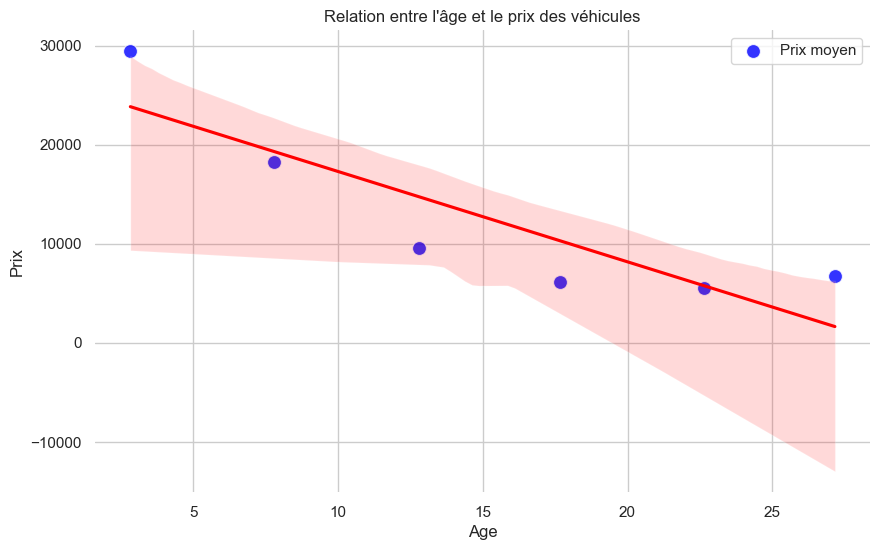

In [ ]:
# Créer des tranches d'âge
bins = np.arange(0, df['Age'].max() + 5, 5)

# Ajouter une nouvelle colonne pour les tranches d'âge
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

# Calculer la moyenne des prix pour chaque tranche d'âge
grouped_df = df.groupby('AgeGroup').mean()

# Définir le style seaborn
sns.set(style="whitegrid")

# Créer le nuage de points agrégé avec seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=grouped_df['Age'], y=grouped_df['Prix'], alpha=0.8, s=100, color='blue')

# Ajouter des labels et un titre
plt.xlabel('Âge des véhicules')
plt.ylabel('Prix moyen')
plt.title('Relation entre l\'âge et le prix des véhicules')

# Ajouter une légende
plt.legend(['Prix moyen'], loc='upper right')

# Personnaliser la grille
sns.despine(left=True, bottom=True)

# Ajouter une ligne de régression pour visualiser la tendance
sns.regplot(x=grouped_df['Age'], y=grouped_df['Prix'], scatter=False, color='red')

# Afficher le plot
plt.show()

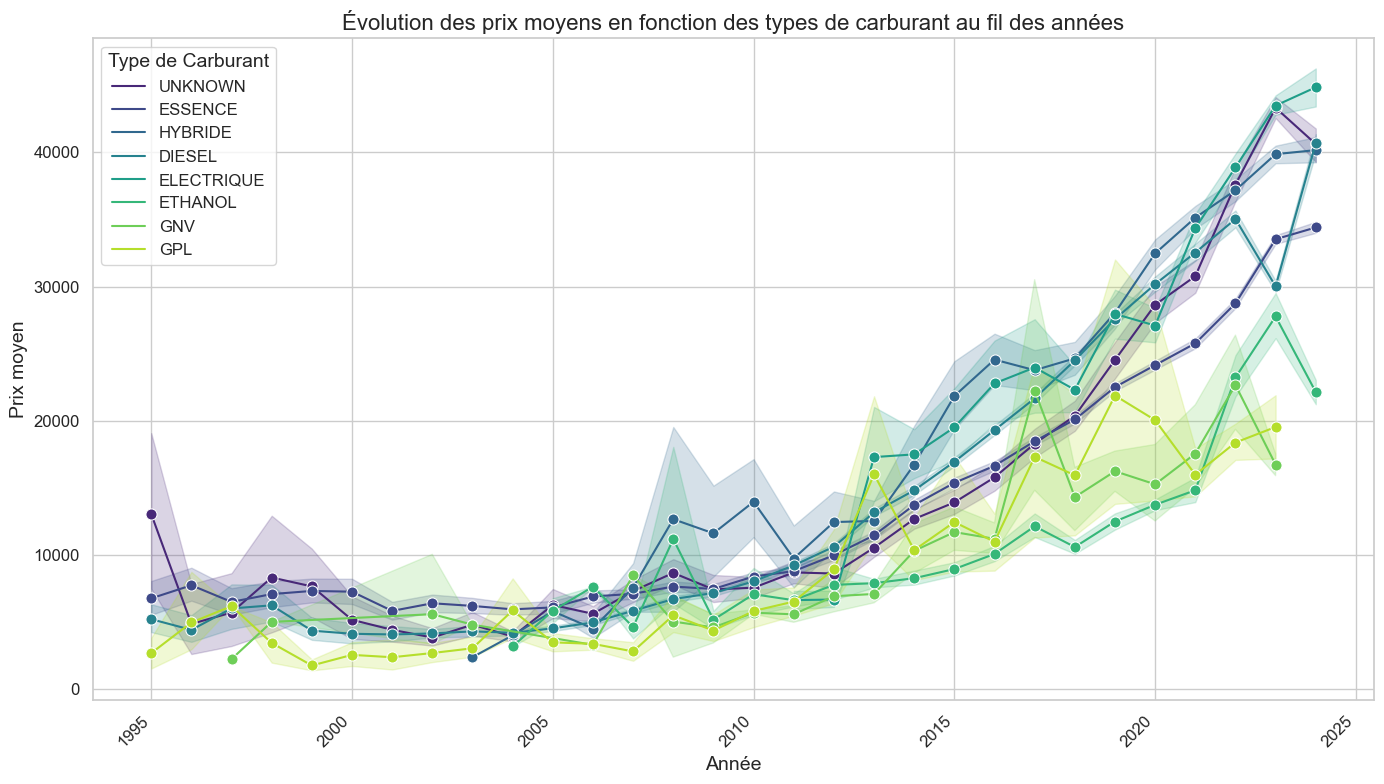

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['Carburant'].fillna('UNKNOWN', inplace=True)


df['Année'] = df['Année'].astype(int)

# Créer un graphique lineplot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Année', y='Prix', hue='Carburant', data=df, palette='viridis', marker='o', markersize=8)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Prix moyen', fontsize=14)
plt.title('Évolution des prix moyens en fonction des types de carburant au fil des années', fontsize=16)
plt.legend(title='Type de Carburant', title_fontsize='14', fontsize='12', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


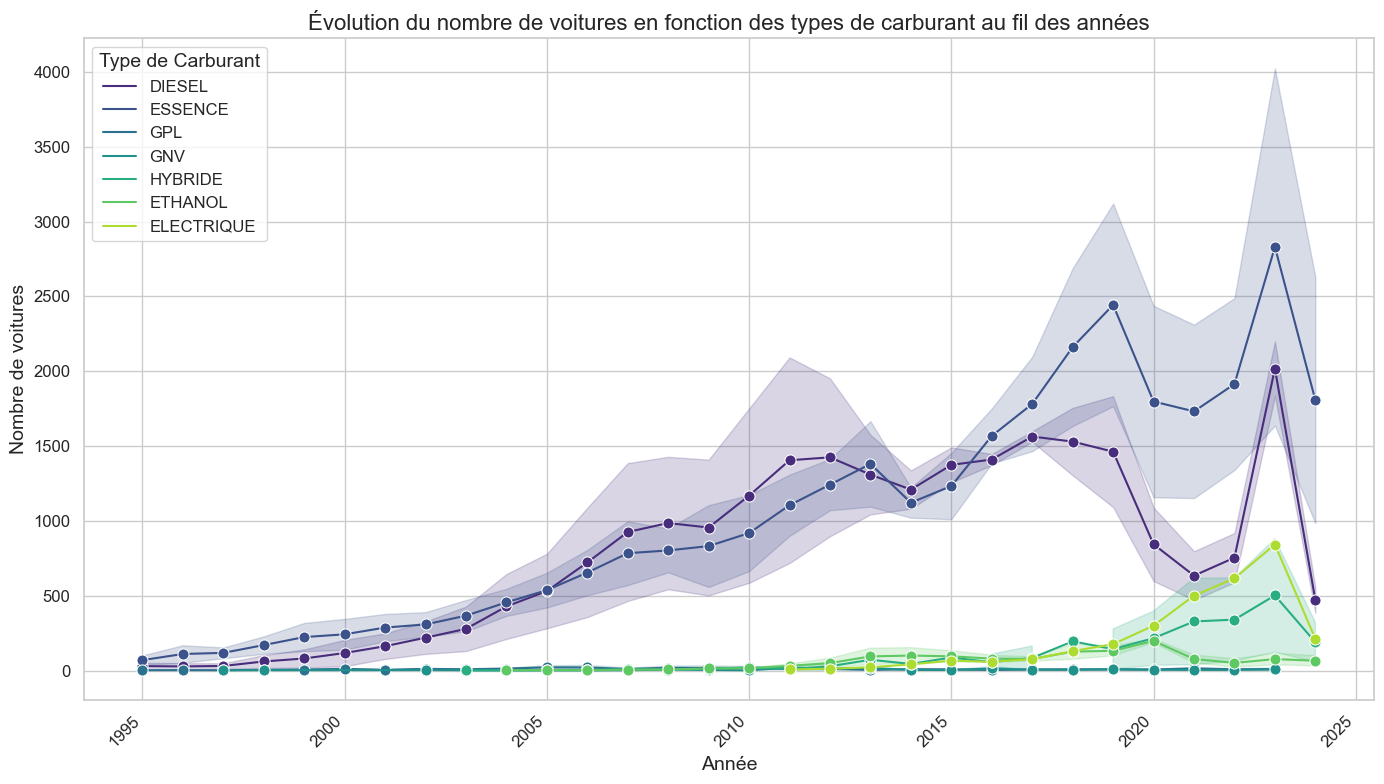

In [ ]:
# Filtrer les lignes où le type de carburant n'est pas 'UNKNOWN'
df_filtered = df[df['Carburant'] != 'UNKNOWN']

# Calculer le nombre total de voitures par année, carburant et type de boîte de vitesse
df_count_carburant = df_filtered.groupby(['Année', 'Carburant', 'Boîte de vitesse'], as_index=False)['Prix'].count()
df_count_carburant = df_count_carburant.rename(columns={'Prix': 'Nombre de voitures'})

# Créer un graphique lineplot pour la quantité (nombre de voitures)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Année', y='Nombre de voitures', hue='Carburant', data=df_count_carburant, palette='viridis', marker='o', markersize=8)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Nombre de voitures', fontsize=14)
plt.title('Évolution du nombre de voitures en fonction des types de carburant au fil des années', fontsize=16)
plt.legend(title='Type de Carburant', title_fontsize='14', fontsize='12', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

Modele      Marque       Date Location     Prix Carburant  \
27            Equinox   Chevrolet 2023-11-24   Canada   2727.0   UNKNOWN   
28           Ram 2500  Ram trucks 2023-11-27   Canada  23111.0   UNKNOWN   
29      Grand caravan       Dodge 2023-11-10   Canada  23179.0   UNKNOWN   
30             Tacoma      Toyota 2023-11-28   Canada  35382.0   UNKNOWN   
31            Golf sw  Volkswagen 2023-12-10   Canada   4704.0   ESSENCE   
...               ...         ...        ...      ...      ...       ...   
158614         Indigo        Tata 2022-01-21    India   2726.0   ESSENCE   
158625         Xuv500    Mahindra 2022-01-21    India  11125.0    DIESEL   
158626         Pajero  Mitsubishi 2022-01-21    India  23363.0    DIESEL   
158627          Manza        Tata 2022-01-21    India   3338.0    DIESEL   
158628           Xylo    Mahindra 2022-01-21    India   6675.0    DIESEL   

        Kilométrage  Année Boîte de vitesse Departements  Continent  Age  \
27         213000.0   2013             <NA>          A1K   AMERIQUE   11   
28         180000.0   2013             <NA>          A1K   AMERIQUE   11   
29          38700.0   2017             <NA>          A1A   AMERIQUE    7   
30          39000.0   2021             <NA>          A1A   AMERIQUE    3   
31         145000.0   2011      AUTOMATIQUE          A1A   AMERIQUE   13   
...             ...    ...              ...          ...        ...  ...   
158614      58000.0   2010         MANUELLE            -       ASIE   14   
158625      66553.0   2012         MANUELLE            -       ASIE   12   
158626      45000.0   2013         MANUELLE            -       ASIE   11   
158627     107000.0   2010         MANUELLE            -       ASIE   14   
158628      38263.0   2011         MANUELLE            -       ASIE   13   

        AgeGroup  
27      (10, 15]  
28      (10, 15]  
29       (5, 10]  
30        (0, 5]  
31      (10, 15]  
...          ...  
158614  (10, 15]  
158625  (10, 15]  
158626  (10, 15]  
158627  (10, 15]  
158628  (10, 15]  

[130188 rows x 13 columns]

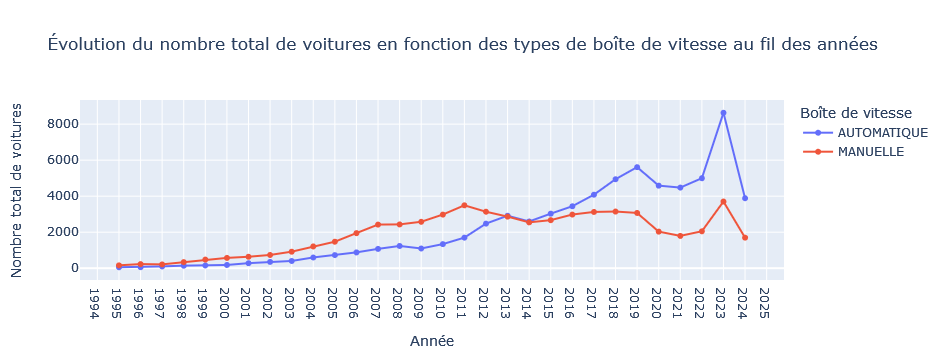

In [ ]:
import plotly.express as px

# Filtrer les lignes où le type de boîte de vitesse n'est pas 'UNKNOWN'
df_filtered = df[df['Boîte de vitesse'].notna() & (df['Boîte de vitesse'] != 'UNKNOWN')]

# Calculer le nombre total de voitures par année et type de boîte de vitesse
df_count = df_filtered.groupby(['Année', 'Boîte de vitesse'], as_index=False)['Prix'].count()
df_count = df_count.rename(columns={'Prix': 'Nombre de voitures'})

# Créer un graphique lineplot avec Plotly
fig = px.line(df_count, x='Année', y='Nombre de voitures', color='Boîte de vitesse', markers=True,
              title='Évolution du nombre total de voitures en fonction des types de boîte de vitesse au fil des années',
              labels={'Nombre de voitures': 'Nombre total de voitures', 'Année': 'Année'},
              category_orders={'Boîte de vitesse': sorted(df_filtered['Boîte de vitesse'].unique())})

# Personnaliser l'affichage
fig.update_layout(xaxis=dict(tickmode='linear'), legend_title='Boîte de vitesse')

# Afficher le graphique
fig.show()


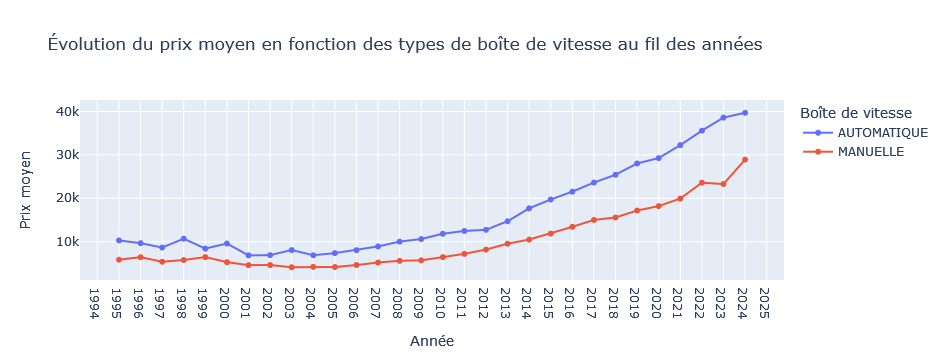

In [ ]:
import plotly.express as px

# Filtrer les lignes où le type de boîte de vitesse n'est pas 'UNKNOWN'
df_filtered = df[df['Boîte de vitesse'].notna() & (df['Boîte de vitesse'] != 'UNKNOWN')]

# Calculer le prix moyen par année et type de boîte de vitesse
df_mean_price = df_filtered.groupby(['Année', 'Boîte de vitesse'], as_index=False)['Prix'].mean()
df_mean_price = df_mean_price.rename(columns={'Prix': 'Prix moyen'})

# Créer un graphique lineplot avec Plotly
fig = px.line(df_mean_price, x='Année', y='Prix moyen', color='Boîte de vitesse', markers=True,
              title='Évolution du prix moyen en fonction des types de boîte de vitesse au fil des années',
              labels={'Prix moyen': 'Prix moyen', 'Année': 'Année'},
              category_orders={'Boîte de vitesse': sorted(df_filtered['Boîte de vitesse'].unique())})

# Personnaliser l'affichage
fig.update_layout(xaxis=dict(tickmode='linear'), legend_title='Boîte de vitesse')

# Afficher le graphique
fig.show()


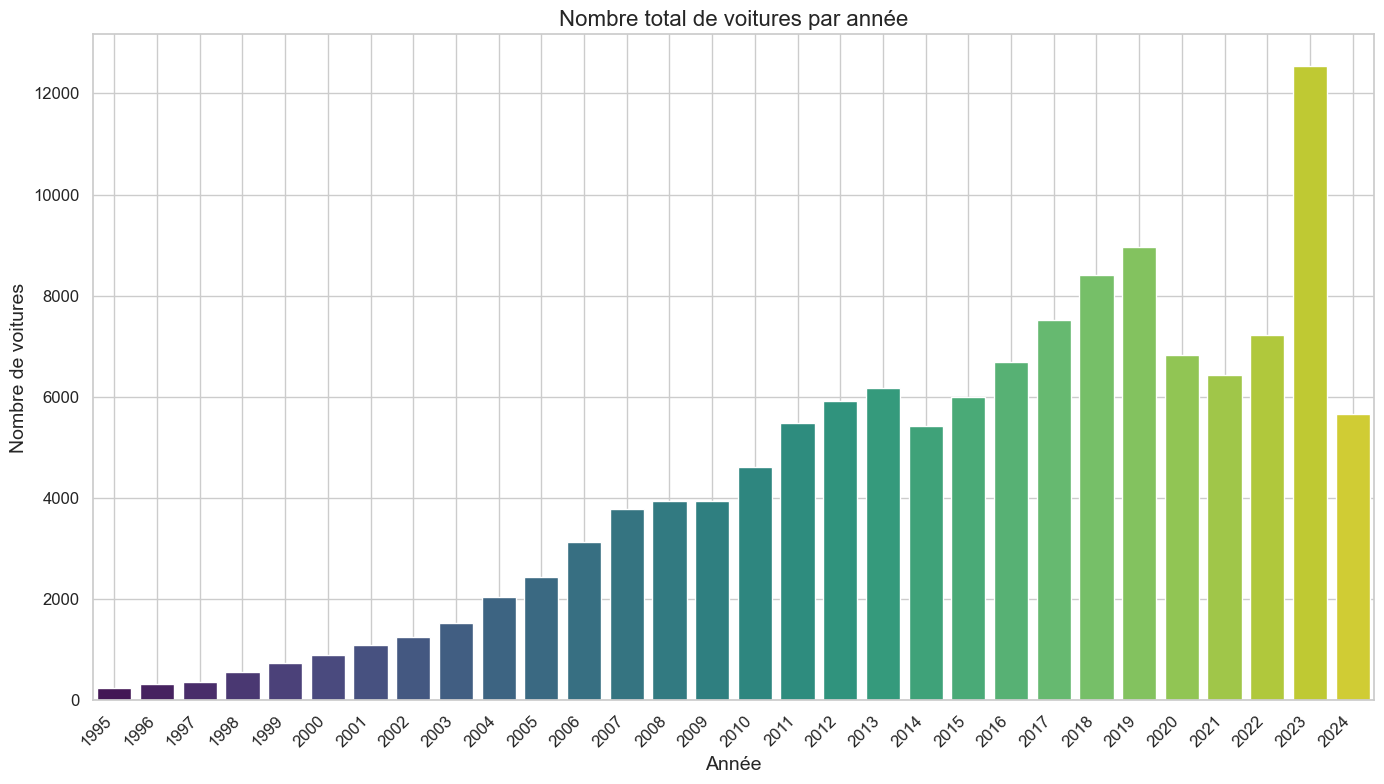

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique barplot pour le nombre total de voitures par année
plt.figure(figsize=(14, 8))
sns.countplot(x='Année', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Nombre de voitures', fontsize=14)
plt.title('Nombre total de voitures par année', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


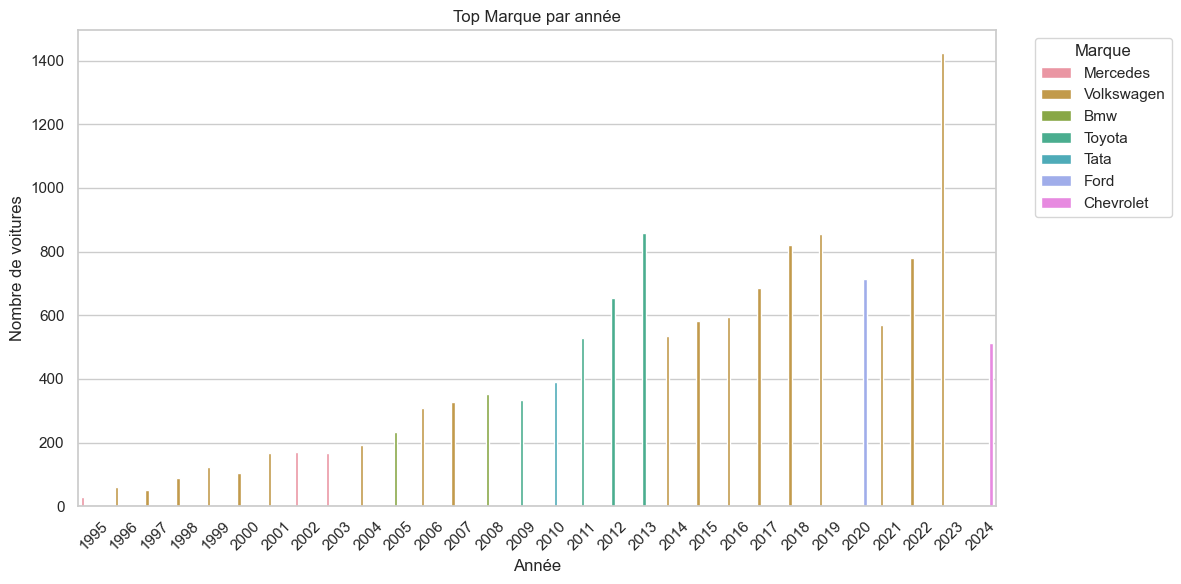

In [ ]:
top_marques = df.groupby(['Année', 'Marque']).size().reset_index(name='Nombre de voitures')
top_marques = top_marques.loc[top_marques.groupby('Année')['Nombre de voitures'].idxmax()]

# Créer un graphique avec des couleurs distinctes pour chaque marque
plt.figure(figsize=(12, 6))
sns.set_palette("husl")  # Utiliser une palette de couleurs distincte
sns.barplot(x='Année', y='Nombre de voitures', hue='Marque', data=top_marques)
plt.title('Top Marque par année')
plt.xlabel('Année')
plt.ylabel('Nombre de voitures')
plt.legend(title='Marque', loc='upper right', bbox_to_anchor=(1.2, 1))  # Ajouter une légende en dehors du graphique
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour plus de lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter les coupures
plt.show()

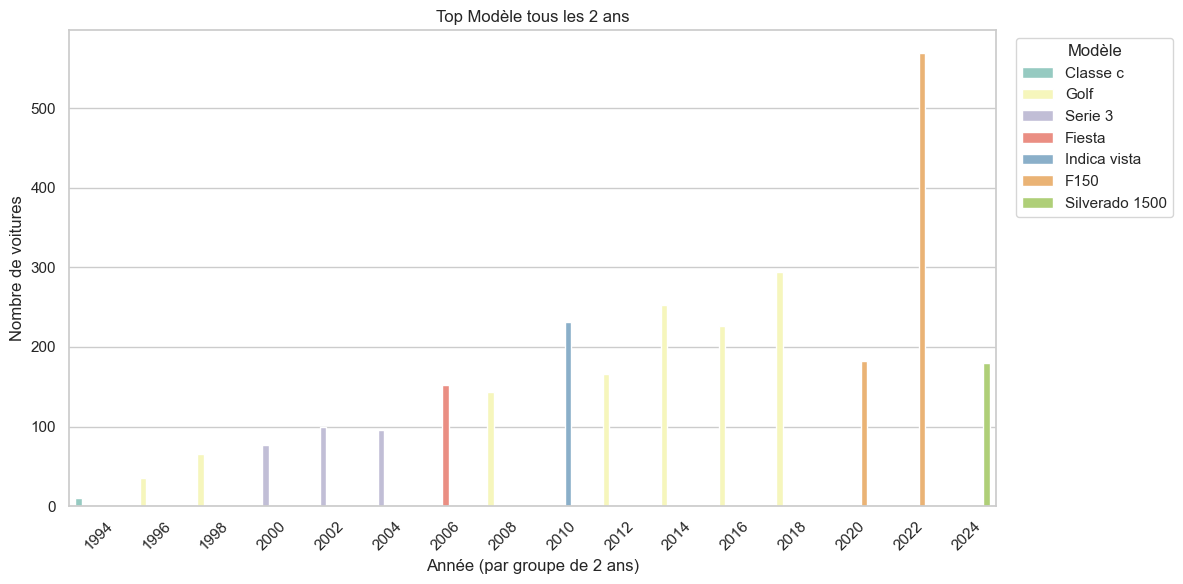

In [ ]:
# Créer une colonne pour regrouper par tranches de 2 ans
df['Année_group'] = df['Année'] // 2 * 2

# Top modèle tous les 2 ans
top_modeles = df.groupby(['Année_group', 'Modele']).size().reset_index(name='Nombre de voitures')
top_modeles = top_modeles.loc[top_modeles.groupby('Année_group')['Nombre de voitures'].idxmax()]

# Créer un graphique avec des couleurs distinctes pour chaque modèle
plt.figure(figsize=(12, 6))
sns.set_palette("Set3")  # Utiliser une palette de couleurs distincte
sns.barplot(x='Année_group', y='Nombre de voitures', hue='Modele', data=top_modeles)
plt.title('Top Modèle tous les 2 ans')
plt.xlabel('Année (par groupe de 2 ans)')
plt.ylabel('Nombre de voitures')
plt.legend(title='Modèle', loc='upper right', bbox_to_anchor=(1.2, 1))  # Ajouter une légende en dehors du graphique
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour plus de lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter les coupures
plt.show()

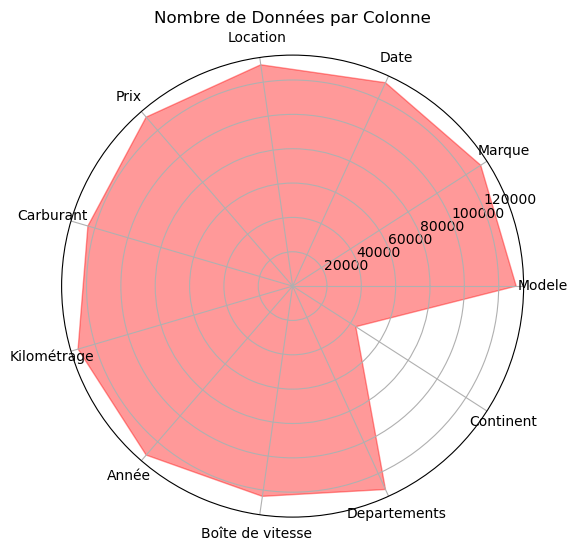

In [27]:
# Comptez le nombre de lignes dans chaque colonne
counts = df.count()

# Créez un graphique radar
categories = counts.index
values = counts.values

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Calculez les angles pour chaque catégorie
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
# Assurez-vous que la liste d'angles a la même longueur que le nombre de catégories
angles += angles[:1]

# Assurez-vous que la liste de valeurs a la même longueur que le nombre de catégories
values = np.append(values, values[:1])

# Tracez les données
ax.fill(angles, values, color='red', alpha=0.4)

# Ajoutez les noms de colonnes comme étiquettes à la place des angles
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Ajoutez les chiffres le long de l'échelle radiale
ax.set_xticks(angles[:-1])


# Affichez le diagramme radar
plt.title('Nombre de Données par Colonne')
plt.show()
